In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Make sure that we're in the root directory of the project
# We can check it by verifying the existence of the `src` directory below
while "src" not in os.listdir():
    os.chdir("..")

# Set the style of the plots
markers = ["o", "s", "D", "v", "p", "P", "X", "h", "H", "d"]
colors_discrete = sns.color_palette("tab10")
colors_continuous = sns.color_palette("viridis")
linestyles = ["-", "--", "-.", ":", "-", "--", "-.", ":"]

# Do not hide any columns
pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid", font_scale=1)

In [4]:
results_path = "kdd/01_12"

betarob_results_path = f"{results_path}/betarce/betarce.feather"
robx_results_path = f"{results_path}/robx/robx.feather"
just_base_results_path = f"{results_path}/just_base/just_base.feather"
k_sweep_results_path = f"{results_path}/ksweep/ksweep.feather"
betarob_params_results_path = f"{results_path}/brce_params/brce_params.feather"
images_dir = f"{results_path}/images"
os.makedirs(images_dir, exist_ok=True)

In [ ]:
import yaml


def process_results(directiory: str):
    results_list = []

    # When .yaml file is found, load all .csv files in {path}/results/
    if os.path.isfile(f"{directiory}/config.yml"):
        with open(f"{directiory}/config.yml") as file:
            try:
                config = yaml.load(file, Loader=yaml.FullLoader)
            except Exception as e:
                print(f"Error loading config file in {directiory}")
                print(e)
                return []

        # Load all .csv files in {path}/results/
        for file in os.listdir(f"{directiory}/results"):
            if file.endswith(".csv"):
                try:
                    df = pd.read_csv(f"{directiory}/results/{file}")
                    df["config"] = config
                    df["robust_cf_method"] = config["experiments_setup"][
                        "robust_cf_method"
                    ]
                    results_list.append(df)
                except Exception as e:
                    print(f"Error loading {file} in {directiory}")
                    print(e)
            elif file.endswith(".feather"):
                try:
                    df = pd.read_feather(f"{directiory}/results/{file}")
                    df["config"] = config
                    results_list.append(df)
                except Exception as e:
                    print(f"Error loading {file} in {directiory}")
                    print(e)

    # Else recursively call process_results on all subdirectories
    else:
        if os.path.isdir(directiory):
            for subdirectory in os.listdir(directiory):
                results_list += process_results(f"{directiory}/{subdirectory}")
        else:
            print(f"No config file found in {directiory}")

    return results_list


def get_results_df(results_list):
    results_df = pd.concat(results_list)
    results_df = results_df.reset_index(drop=True)
    return results_df

In [6]:
# betarce_df = pd.concat(process_results(betarob_results_path)).reset_index(drop=True)
# betarce_df['base_cf_method'].value_counts()
# SAVE_SPOT = 'kdd/01_12/betarce'
# os.makedirs(SAVE_SPOT, exist_ok=True)
# betarce_df.to_feather(f'{SAVE_SPOT}/betarce.feather')

# just_base_df = pd.concat(process_results(just_base_results_path)).reset_index(drop=True)
# just_base_df['base_cf_method'].value_counts(dropna=False)
# SAVE_SPOT = 'kdd/01_12/just_base'
# os.makedirs(SAVE_SPOT, exist_ok=True)
# just_base_df.to_feather(f'{SAVE_SPOT}/just_base.feather')

# robx_df = pd.concat(process_results(robx_results_path)).reset_index(drop=True)
# robx_df['base_cf_method'].value_counts()
# SAVE_SPOT = 'kdd/01_12/robx'
# os.makedirs(SAVE_SPOT, exist_ok=True)
# robx_df.to_feather(f'{SAVE_SPOT}/robx.feather')

# ksweep_df = pd.concat(process_results(k_sweep_results_path)).reset_index(drop=True)
# ksweep_df['base_cf_method'].value_counts()
# SAVE_SPOT = 'kdd/01_12/ksweep'
# os.makedirs(SAVE_SPOT, exist_ok=True)
# ksweep_df.to_feather(f'{SAVE_SPOT}/ksweep.feather')

# brce_params_df = pd.concat(process_results(betarob_params_results_path)).reset_index(drop=True)
# brce_params_df['base_cf_method'].value_counts()
# SAVE_SPOT = 'kdd/01_12/brce_params'
# os.makedirs(SAVE_SPOT, exist_ok=True)
# brce_params_df.to_feather(f'{SAVE_SPOT}/brce_params.feather')



In [110]:
betarce_df = pd.read_feather(betarob_results_path)
betarce_df["this_is_generalization"] = (
    betarce_df["experiment_generalization_type"] != betarce_df["experiment_type"]
)
# raw_df['generalization_type'][raw_df['this_is_generalization'] == False] = 'Original'
betarce_df["generalization_type"] = betarce_df[
    ["this_is_generalization", "experiment_generalization_type"]
].apply(lambda x: "g_" + x[1] if x[0] else "Original", axis=1)
g_c = betarce_df["this_is_generalization"].value_counts(dropna=False)
d_c = betarce_df["delta_robustness"].value_counts()

print(g_c)
print(d_c)

True     224931
False    171008
Name: this_is_generalization, dtype: int64
0.8    198224
0.9    197715
Name: delta_robustness, dtype: int64


In [78]:
ksweep_df = pd.read_feather(k_sweep_results_path)
robx_df = pd.read_feather(robx_results_path)
just_base_df = pd.read_feather(just_base_results_path)
brce_params_df = pd.read_feather(betarob_params_results_path)

# Print counts =
print(f"betarce_df: {betarce_df.shape[0]}")
print(f"ksweep_df: {ksweep_df.shape[0]}")
print(f"robx_df: {robx_df.shape[0]}")
print(f"just_base_df: {just_base_df.shape[0]}")
print(f"brce_params_df: {brce_params_df.shape[0]}")

betarce_df: 395939
ksweep_df: 238106
robx_df: 907200
just_base_df: 2559600
brce_params_df: 898423


In [79]:
new_datasets_raw = get_results_df(process_results("kdd/01_12/datasets"))

No config file found in kdd/01_12/datasets/models/rice/Bootstrap/neural_network/2/model_15.joblib
No config file found in kdd/01_12/datasets/models/rice/Bootstrap/neural_network/2/model_23.joblib
No config file found in kdd/01_12/datasets/models/rice/Bootstrap/neural_network/2/model_43.joblib
No config file found in kdd/01_12/datasets/models/rice/Bootstrap/neural_network/2/model_42.joblib
No config file found in kdd/01_12/datasets/models/rice/Bootstrap/neural_network/2/model_46.joblib
No config file found in kdd/01_12/datasets/models/rice/Bootstrap/neural_network/2/model_26.joblib
No config file found in kdd/01_12/datasets/models/rice/Bootstrap/neural_network/2/model_36.joblib
No config file found in kdd/01_12/datasets/models/rice/Bootstrap/neural_network/2/model_30.joblib
No config file found in kdd/01_12/datasets/models/rice/Bootstrap/neural_network/2/model_45.joblib
No config file found in kdd/01_12/datasets/models/rice/Bootstrap/neural_network/2/model_48.joblib
No config file found

In [ ]:
new_datasets_df = new_datasets_raw.copy()
new_datasets_df["just_base_cf"] = new_datasets_df["is_e2e"] == True
new_datasets_df["experiment_generalization_type"] = new_datasets_df["experiment_type"]
new_datasets_df["this_is_generalization"] = False

rename = {
    "k": "k_mlps_in_B",
    "beta": "beta_confidence",
    "delta": "delta_robustness",
}

new_datasets_df = new_datasets_df.rename(columns=rename)

In [ ]:
print(f"before: jsut_base_df: {just_base_df.shape[0]}")
print(f"before: betarce_df: {betarce_df.shape[0]}")

_d1 = new_datasets_df[new_datasets_df["is_e2e"] == True].copy()
_d2 = new_datasets_df[
    (
        (new_datasets_df["is_base"] == True)
        & (new_datasets_df["robust_cf_method"].isna())
    )
].copy()


_r1 = new_datasets_df[
    (
        (new_datasets_df["is_base"] == True)
        & (~new_datasets_df["robust_cf_method"].isna())
    )
].copy()

# Add to jsut_base_df
just_base_df = pd.concat([just_base_df, _d1, _d2], axis=0).reset_index(drop=True)
betarce_df = pd.concat([betarce_df, _r1], axis=0).reset_index(drop=True)
print(f"just_base_df: {just_base_df.shape[0]}")
print(f"betarce_df: {betarce_df.shape[0]}")

before: jsut_base_df: 3383434
before: betarce_df: 395939


/tmp/ipykernel_30889/1506910961.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  betarce_df = pd.concat([betarce_df, _r1], axis=0).reset_index(drop=True)


just_base_df: 4207268
betarce_df: 585605


In [ ]:
# THis is just stupid adherence to the previous naming convention

mask = betarce_df["tau"].isna() == False

# Debug prints
print(betarce_df.loc[mask, ["delta_robustness", "beta_confidence"]].shape)
print(betarce_df.loc[mask, ["tau", "variance"]].shape)

# Assignment
betarce_df.loc[mask, ["delta_robustness", "beta_confidence"]] = betarce_df.loc[
    mask, ["tau", "variance"]
].values

(97200, 2)
(97200, 2)


In [ ]:
betarce_df["delta_robustness"].value_counts(dropna=False)

0.8    244457
0.9    243948
0.5     97200
Name: delta_robustness, dtype: int64

<html>
<p style="background-color: red; text-align: center;"><b>Generalization</b></p>
</html>

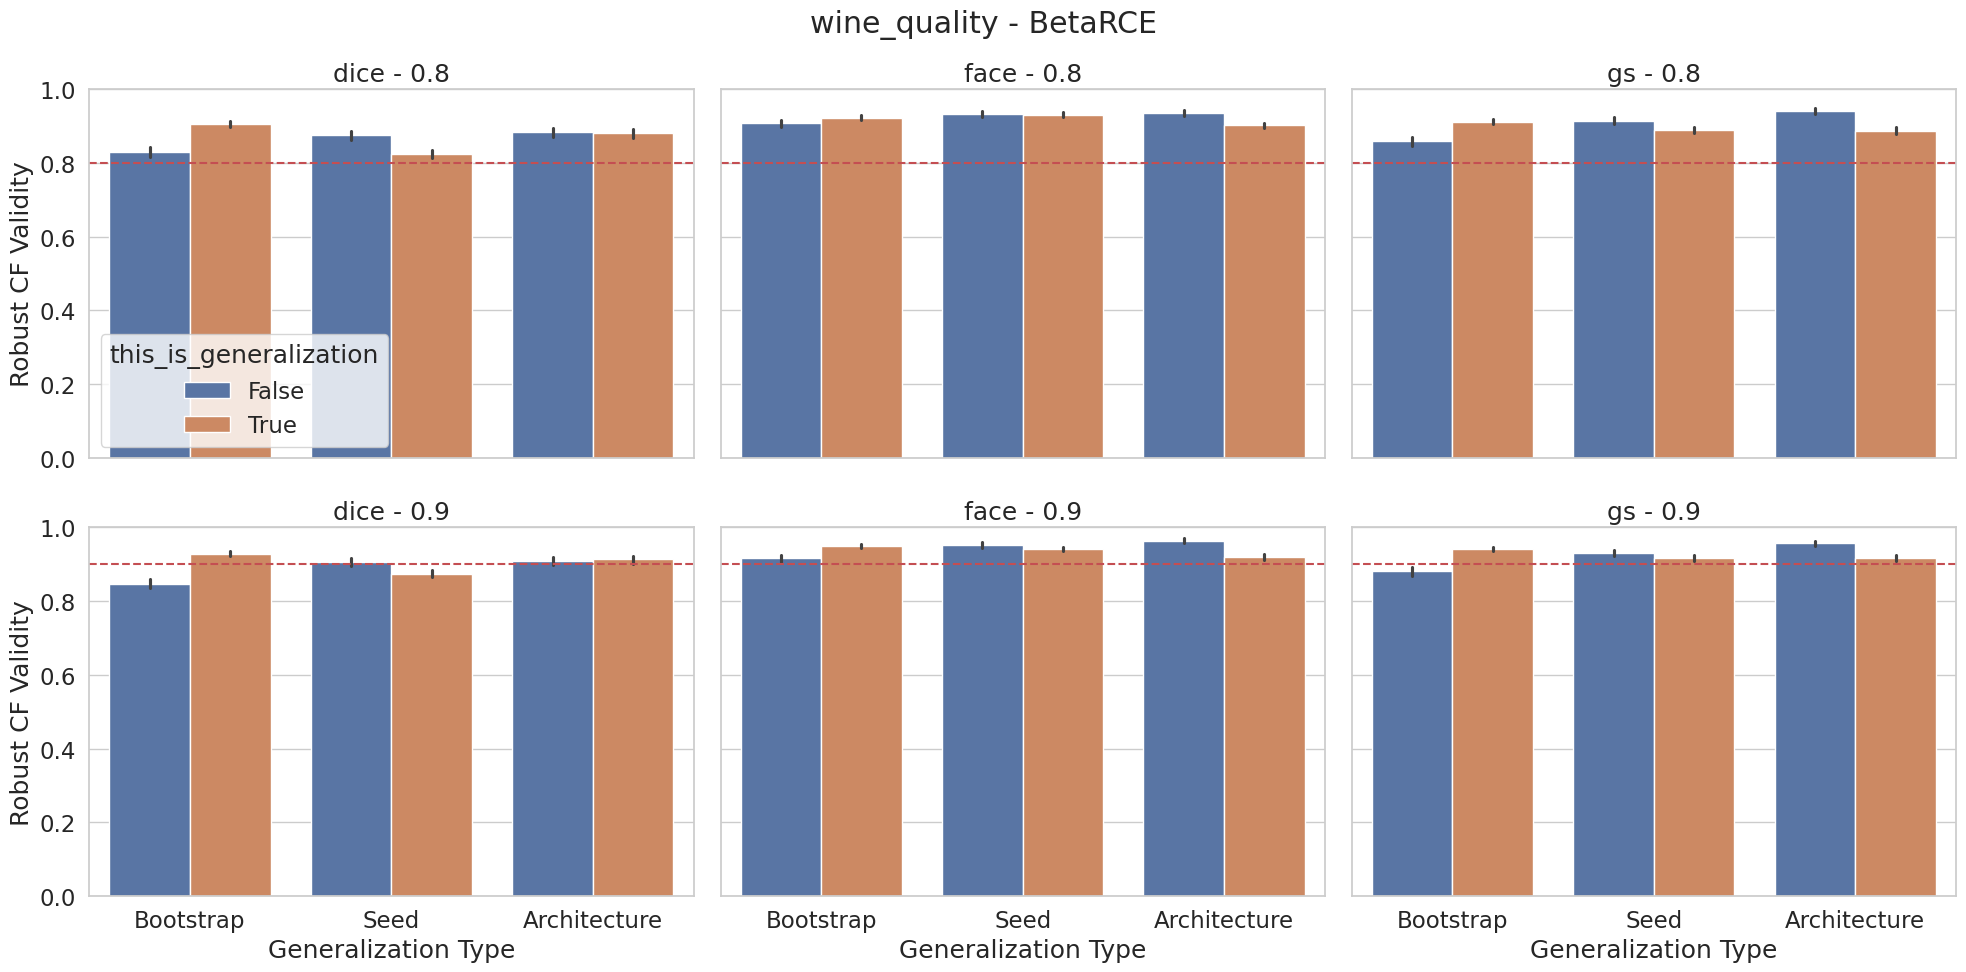

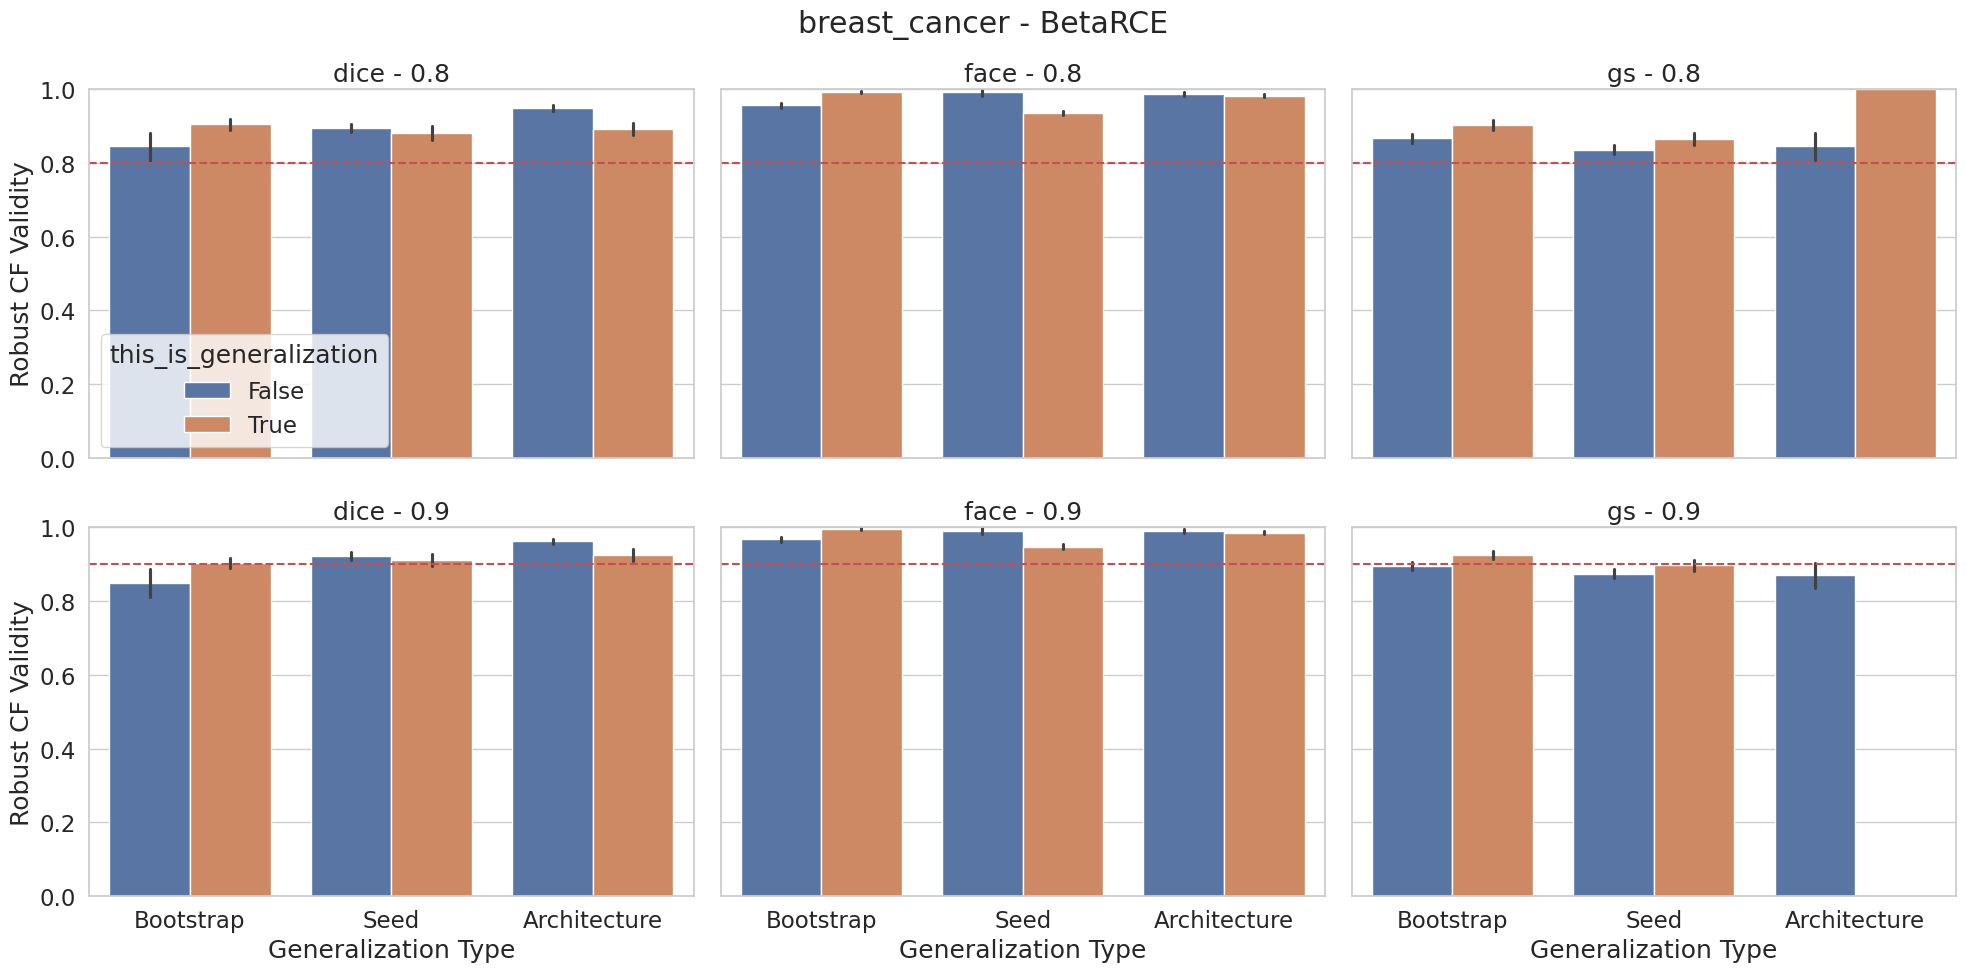

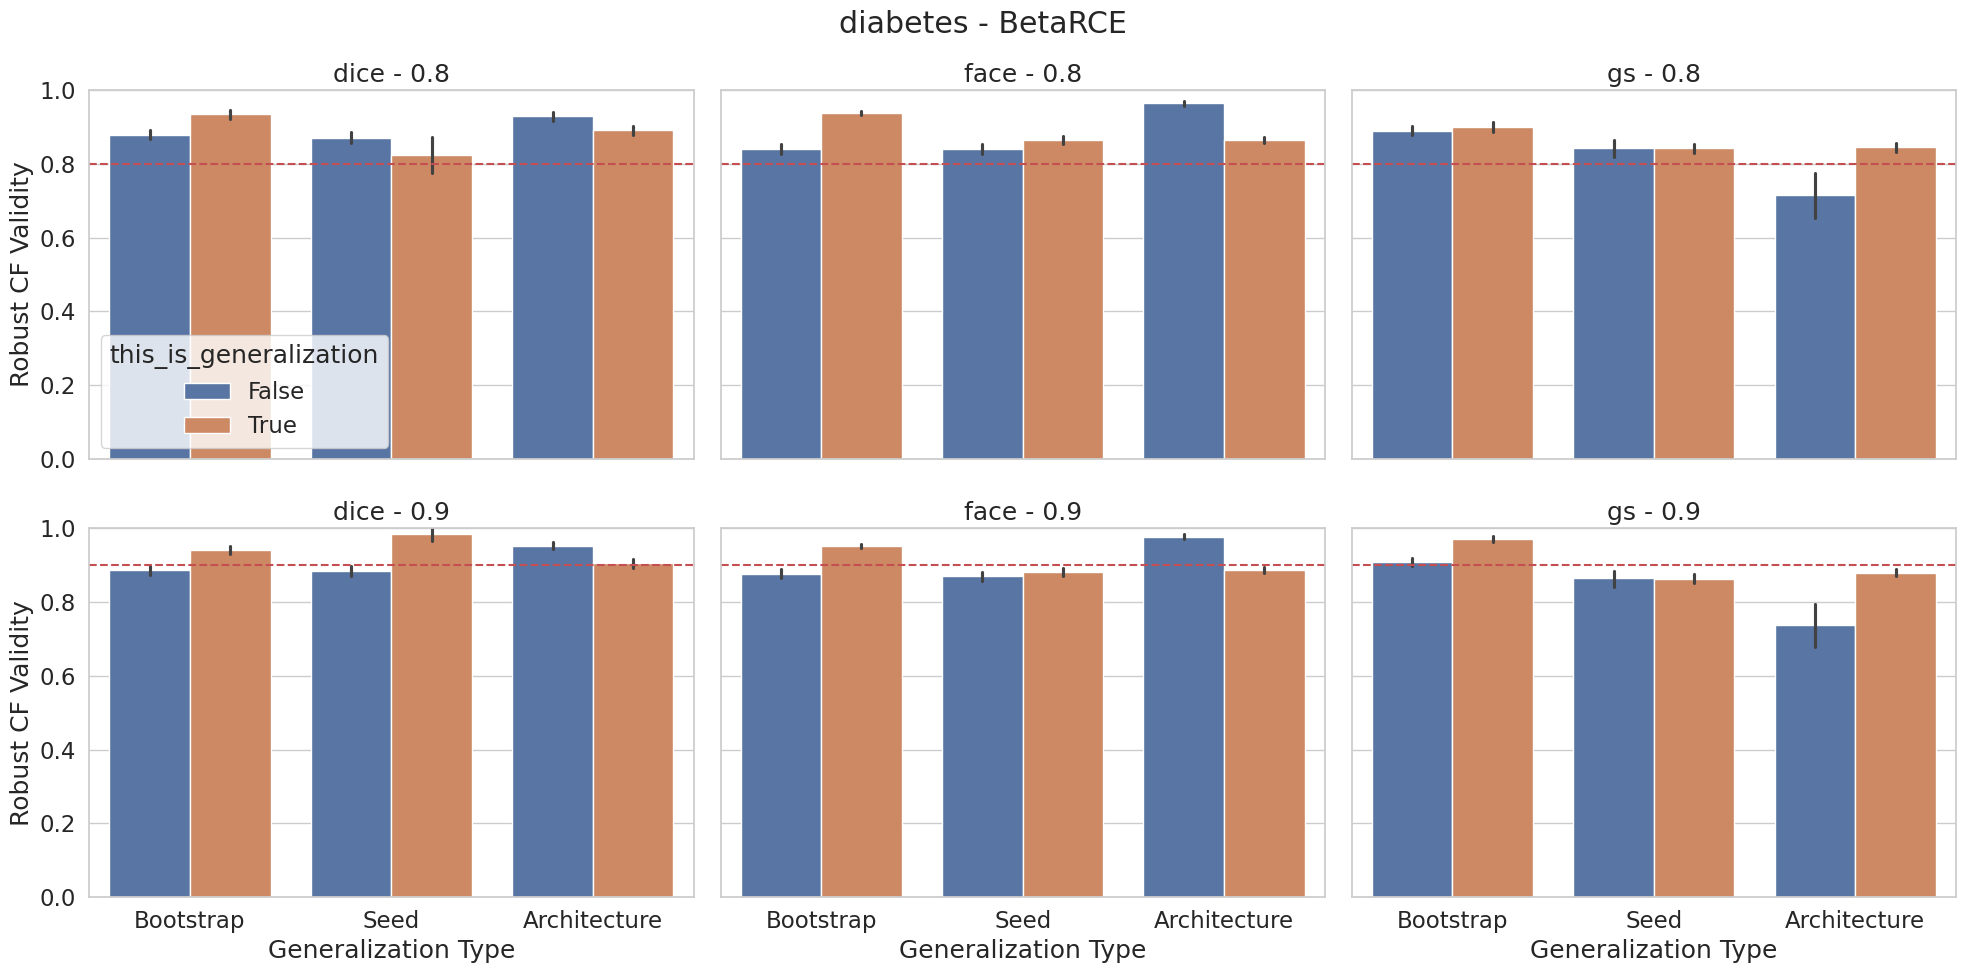

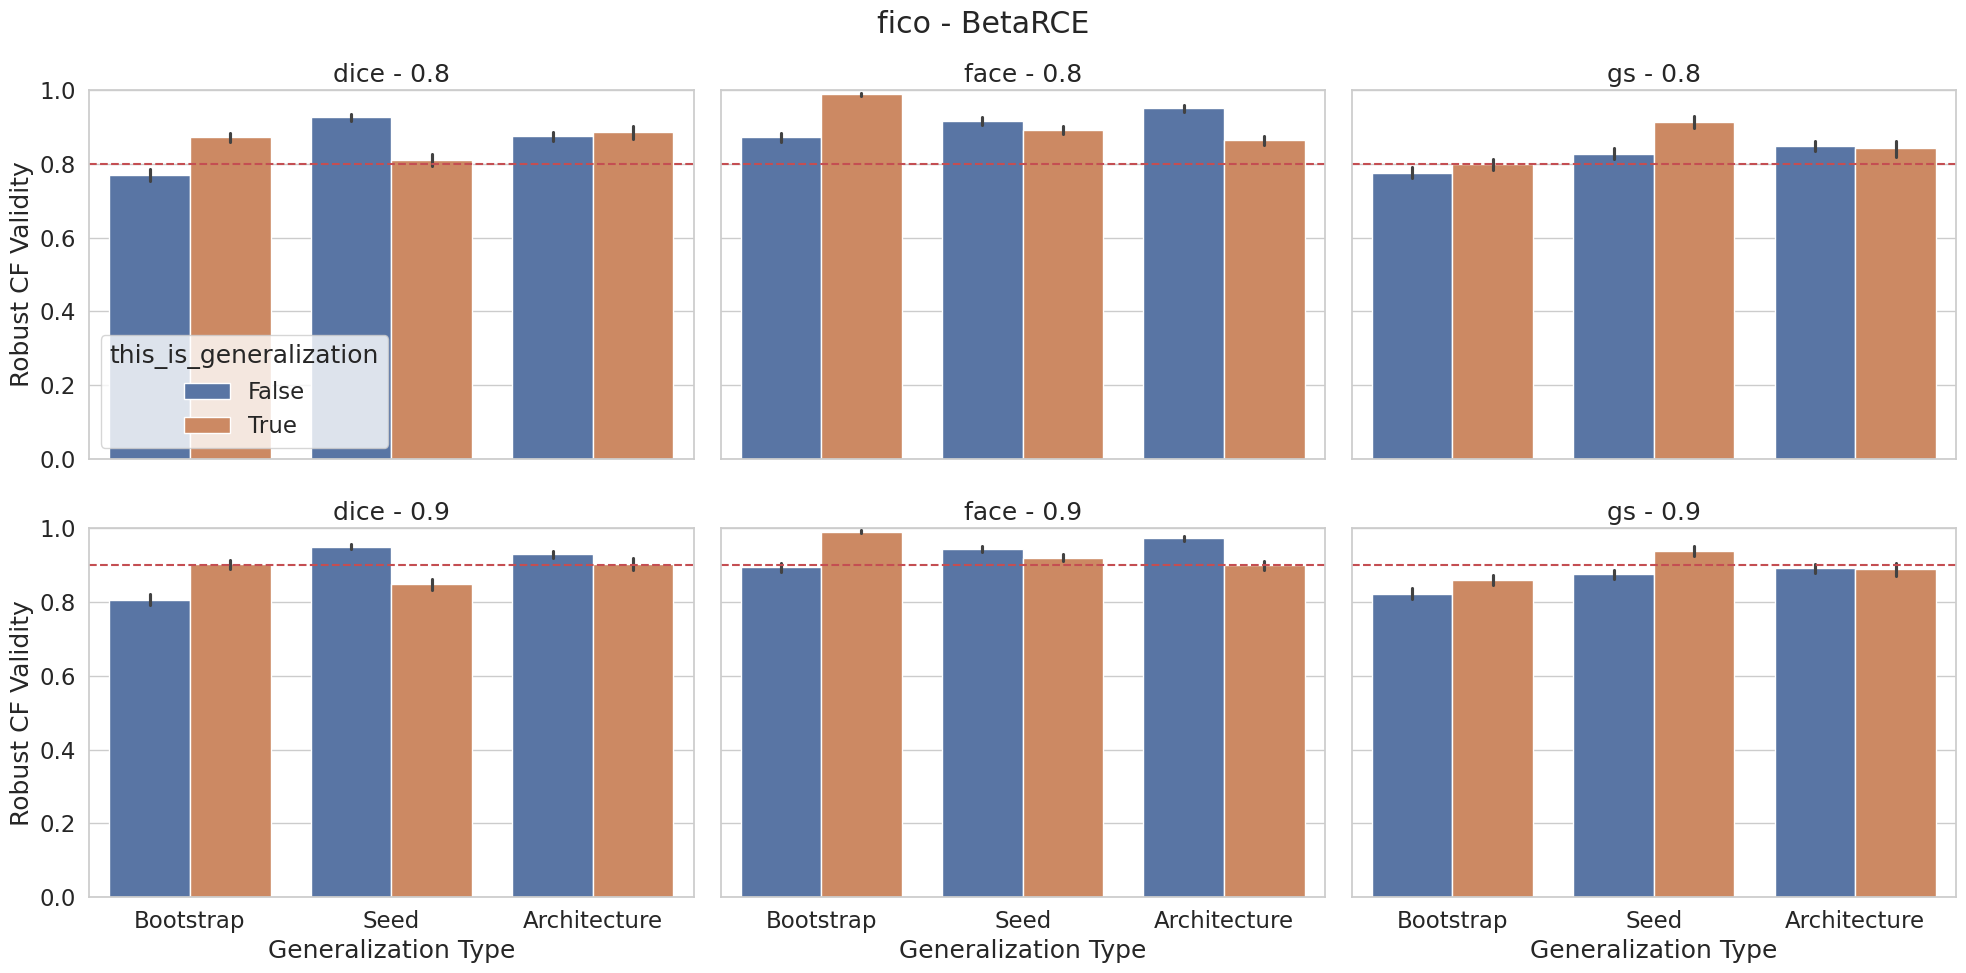

In [ ]:
generalization_subdir = "generalization"
just_save = True
os.makedirs(f"{images_dir}/{generalization_subdir}", exist_ok=True)

agg_by = [
    "experiment_type",
    "experiment_generalization_type",
    "this_is_generalization",
    "base_cf_method",
    "delta_robustness",
]
agg_df = (
    betarce_df.groupby(agg_by)
    .agg(
        n=("robust_counterfactual_validity_model2", "count"),
        mean_robust_cf_validity=("robust_counterfactual_validity_model2", "mean"),
        std_robust_cf_validity=("robust_counterfactual_validity_model2", "std"),
        mean_base_cf_validity=("base_counterfactual_validity_model2", "mean"),
        std_base_cf_validity=("base_counterfactual_validity_model2", "std"),
    )
    .reset_index()
)

sns.set_theme(style="whitegrid", font_scale=1.5)

cols = sorted(betarce_df["base_cf_method"].unique())
rows = sorted(betarce_df["delta_robustness"].unique())
x = "experiment_type"
markers = "this_is_generalization"
y = "robust_counterfactual_validity_model2"
hue = "this_is_generalization"


for dataset in betarce_df["dataset_name"].unique():
    dataset_filtered_df = betarce_df[betarce_df["dataset_name"] == dataset]

    fig, ax = plt.subplots(
        len(rows), len(cols), figsize=(20, 10), sharex=True, sharey=True
    )

    for i, row in enumerate(rows):
        for j, col in enumerate(cols):
            df = dataset_filtered_df[
                (dataset_filtered_df["base_cf_method"] == col)
                & (dataset_filtered_df["delta_robustness"] == row)
            ]
            sns.barplot(
                data=df,
                x=x,
                y=y,
                hue=hue,
                ax=ax[i, j],
                legend=True if i == 0 and j == 0 else False,
            )

            # Draw a horizontal line at delta_robustness
            ax[i, j].axhline(row, color="r", linestyle="--")

            ax[i, j].set_title(f"{col} - {row}")
            ax[i, j].set_ylim(0, 1)
            ax[i, j].set_ylabel("Robust CF Validity")
            ax[i, j].set_xlabel("Generalization Type")

    plt.suptitle(f"{dataset} - BetaRCE")
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.savefig(
        f"{images_dir}/{generalization_subdir}/{dataset}_betarce.png",
        dpi=300,
        bbox_inches="tight",
    )
    if not just_save:
        plt.show()

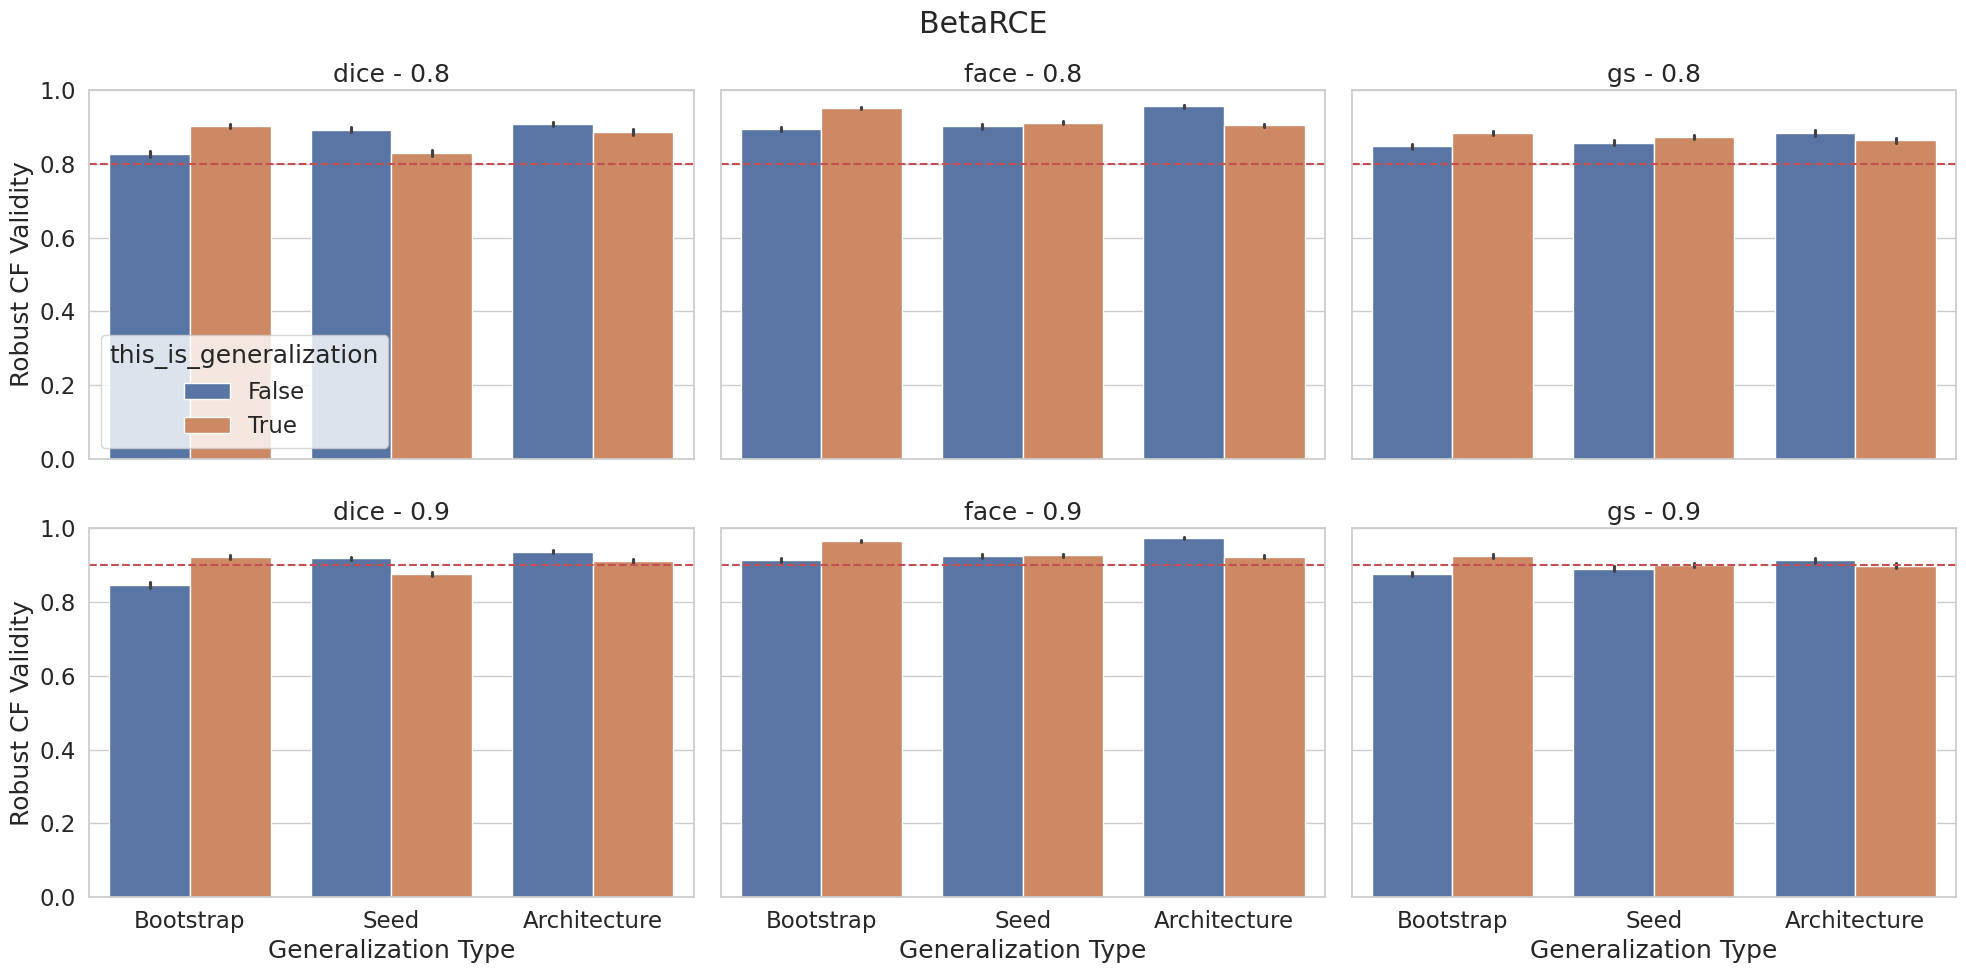

In [ ]:
agg_by = [
    "experiment_type",
    "experiment_generalization_type",
    "this_is_generalization",
    "base_cf_method",
    "delta_robustness",
]
agg_df = (
    betarce_df.groupby(agg_by)
    .agg(
        n=("robust_counterfactual_validity_model2", "count"),
        mean_robust_cf_validity=("robust_counterfactual_validity_model2", "mean"),
        std_robust_cf_validity=("robust_counterfactual_validity_model2", "std"),
        mean_base_cf_validity=("base_counterfactual_validity_model2", "mean"),
        std_base_cf_validity=("base_counterfactual_validity_model2", "std"),
    )
    .reset_index()
)

sns.set_theme(style="whitegrid", font_scale=1.5)

cols = sorted(betarce_df["base_cf_method"].unique())
rows = sorted(betarce_df["delta_robustness"].unique())
x = "experiment_type"
markers = "this_is_generalization"
y = "robust_counterfactual_validity_model2"
hue = "this_is_generalization"

fig, ax = plt.subplots(len(rows), len(cols), figsize=(20, 10), sharex=True, sharey=True)

for i, row in enumerate(rows):
    for j, col in enumerate(cols):
        df = betarce_df[
            (betarce_df["base_cf_method"] == col)
            & (betarce_df["delta_robustness"] == row)
        ]
        sns.barplot(
            data=df,
            x=x,
            y=y,
            hue=hue,
            ax=ax[i, j],
            legend=True if i == 0 and j == 0 else False,
        )

        # Draw a horizontal line at delta_robustness
        ax[i, j].axhline(row, color="r", linestyle="--")

        ax[i, j].set_title(f"{col} - {row}")
        ax[i, j].set_ylim(0, 1)
        ax[i, j].set_ylabel("Robust CF Validity")
        ax[i, j].set_xlabel("Generalization Type")

plt.suptitle("BetaRCE")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig(
    f"{images_dir}/{generalization_subdir}/betarce.png", dpi=300, bbox_inches="tight"
)
plt.show()

In [18]:
agg_df = agg_df.rename(
    columns={
        "experiment_type": "Original",
        "experiment_generalization_type": "Generalization",
    }
)

In [ ]:
_agg_df = agg_df[agg_df["delta_robustness"] == 0.9]

for base_method in _agg_df["base_cf_method"].unique():
    __agg_df = _agg_df[_agg_df["base_cf_method"] == base_method]
    __agg_df = __agg_df[
        [
            "Original",
            "Generalization",
            "mean_robust_cf_validity",
            "std_robust_cf_validity",
            "n",
        ]
    ]

    print(__agg_df)

    means = __agg_df.pivot(
        index="Original", columns="Generalization", values="mean_robust_cf_validity"
    ).round(3)
    stds = __agg_df.pivot(
        index="Original", columns="Generalization", values="std_robust_cf_validity"
    ).round(3)
    cis = (1.96 * stds / np.sqrt(__agg_df["n"].values[0])).round(3)

    # Join them so each cell is mean \pm std
    means = means.astype(str)
    cis = cis.astype(str)
    generalization_results: pd.DataFrame = means + " ± " + cis

    # Convert to LaTeX
    generalization_results = generalization_results.to_latex(
        escape=False,
        column_format="l" + "c" * generalization_results.shape[1],
        caption=f"Generalization analysis aggregated over all datasets for $\delta = 0.9$ and {base_method} as the base CFE generation method.",
        label=f"app:tab:generalization-{base_method}",
        bold_rows=True,
    )
    print(generalization_results)
    # Save to file
    with open(
        f"{images_dir}/{generalization_subdir}/generalization_results_{base_method}.tex",
        "w",
    ) as file:
        file.write(generalization_results)

        Original Generalization  mean_robust_cf_validity  \
1   Architecture   Architecture                 0.936566   
7   Architecture      Bootstrap                 0.874545   
13  Architecture           Seed                 0.929973   
19     Bootstrap   Architecture                 0.927333   
25     Bootstrap      Bootstrap                 0.846809   
31     Bootstrap           Seed                 0.913015   
37          Seed   Architecture                 0.928824   
43          Seed      Bootstrap                 0.804537   
49          Seed           Seed                 0.918056   

    std_robust_cf_validity      n  
1                 0.243755   9900  
7                 0.331301   2471  
13                0.255219   4841  
19                0.259610   6000  
25                0.360193   8460  
31                0.281844   4541  
37                0.257145   5100  
43                0.396609   3791  
49                0.274294  10080  
\begin{table}
\centering
\caption{Gener

/tmp/ipykernel_15298/182413571.py:31: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  generalization_results = generalization_results.to_latex(
/tmp/ipykernel_15298/182413571.py:31: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  generalization_results = generalization_results.to_latex(
/tmp/ipykernel_15298/182413571.py:31: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The

<html>
<p style="background-color: red; text-align: center;"><b>Basic tables</b></p>
</html>

In [89]:
just_base_df[["base_cf_method", "dataset_name"]].value_counts().sort_index()

# Pivot table
agg_by = ["dataset_name", "base_cf_method"]
agg_df = (
    just_base_df.groupby(agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        validity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("base_counterfactual_validity_model2", "mean"),
        robustness_std=("base_counterfactual_validity_model2", "std"),
        proximityL1=("base_counterfactual_proximityL1", "mean"),
        proximityL1_std=("base_counterfactual_proximityL1", "std"),
    )
    .reset_index()
)
agg_df.round(2)

,dataset_name,base_cf_method,n,validity,validity_std,robustness,robustness_std,proximityL1,proximityL1_std
0,breast_cancer,dice,218700,1.00,0.00,0.55,0.50,1.62,0.93
1,breast_cancer,face,40500,1.00,0.00,0.90,0.30,3.43,1.41
2,breast_cancer,gs,8100,1.00,0.00,0.52,0.50,3.09,1.92
3,breast_cancer,rbr,218700,0.39,0.49,0.36,0.48,2.65,1.28
4,breast_cancer,roar,145800,0.39,0.49,0.38,0.49,9.27,9.79
5,car_eval,dice,16200,1.00,0.00,0.83,0.38,1.19,0.56
6,car_eval,face,16200,1.00,0.00,0.78,0.41,0.98,0.50
7,car_eval,gs,13834,1.00,0.00,0.59,0.49,0.96,0.68
8,car_eval,rbr,218700,0.74,0.44,0.64,0.48,0.82,0.45
9,car_eval,roar,145800,0.26,0.44,0.26,0.44,1.64,1.77


In [90]:
robust_params_map = {
    "robx": ["beta_confidence", "delta_robustness"],
    "betarob": ["beta_confidence", "delta_robustness"],
}
base_params_map = {
    "dice": ["proximity_weight", "diversity_weight", "sparsity_weight"],
    "face": ["mode", "fraction"],
    "roar": ["delta_max", "lr", "norm"],
    "rbr": ["perturb_radius", "delta_plus", "sigma"],
    "gs": ["max_iter", "n_search_samples", "p_norm", "step", "target_proba"],
}

just_base_df["sigma"].value_counts(dropna=False)

NaN    2071234
0.5     437400
1.5     437400
1.0     437400
Name: sigma, dtype: int64

In [91]:
just_base_df["base_cf_hp_name"] = [None] * len(just_base_df)

for base_method, params in base_params_map.items():
    for row in just_base_df.itertuples():
        if row.base_cf_method == base_method:
            hp_name = base_method + "-".join(
                [f"{param}={getattr(row, param)}" for param in params]
            )
            just_base_df.at[row.Index, "base_cf_hp_name"] = hp_name

just_base_df["base_cf_hp_name"].value_counts(dropna=False)

just_base_df[["base_cf_hp_name", "dataset_name"]].value_counts().sort_index()

base_cf_hp_name                                                       dataset_name 
diceproximity_weight=0.05-diversity_weight=0.05-sparsity_weight=0.05  breast_cancer    8100
                                                                      diabetes         8100
                                                                      fico             8100
                                                                      wine_quality     8100
diceproximity_weight=0.05-diversity_weight=0.05-sparsity_weight=0.1   breast_cancer    8100
                                                                                       ... 
roardelta_max=0.1-lr=0.1-norm=2.0                                     car_eval         8100
                                                                      diabetes         8100
                                                                      fico             8100
                                                                      rice             8

In [92]:
# Pivot table
agg_by = ["dataset_name", "base_cf_method", "base_cf_hp_name"]
base_agg_df = (
    just_base_df.groupby(agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("base_counterfactual_validity_model2", "mean"),
        robustness_std=("base_counterfactual_validity_model2", "std"),
        proximityL1=("base_counterfactual_proximityL1", "mean"),
        proximityL1_std=("base_counterfactual_proximityL1", "std"),
        proximityL2=("base_counterfactual_proximityL2", "mean"),
        proximityL2_std=("base_counterfactual_proximityL2", "std"),
        plausibility=("base_counterfactual_plausibility", "mean"),
        plausibility_std=("base_counterfactual_plausibility", "std"),
        dpow=("base_counterfactual_discriminative_power", "mean"),
        dpow_std=("base_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

# Select top 1 mean_base_cf_validity out base_cf_method
base_agg_df = (
    base_agg_df.sort_values("robustness", ascending=False)
    .groupby(["dataset_name", "base_cf_method"])
    .head(1)
    .sort_values("dataset_name")
)

base_agg_df.round(2).head(3)

,dataset_name,base_cf_method,base_cf_hp_name,n,vailidity,validity_std,robustness,robustness_std,proximityL1,proximityL1_std,proximityL2,proximityL2_std,plausibility,plausibility_std,dpow,dpow_std
29,breast_cancer,face,facemode=epsilon-fraction=0.5,8100,1.0,0.00,0.91,0.28,3.29,1.36,0.75,0.31,0.42,0.13,0.63,0.22
45,breast_cancer,rbr,rbrperturb_radius=0.2-delta_plus=0.0-sigma=1.5,8100,0.4,0.49,0.39,0.49,2.63,1.29,0.61,0.31,0.55,0.20,0.68,0.27
33,breast_cancer,gs,gsmax_iter=100.0-n_search_samples=100.0-p_norm...,8100,1.0,0.00,0.52,0.50,3.09,1.92,0.70,0.43,0.85,0.37,0.23,0.22


In [93]:
betarce_df["robust_cf_hp_name"] = [None] * len(betarce_df)

for robust_cf_method, params in robust_params_map.items():
    for row in betarce_df.itertuples():
        if row.robust_cf_method == robust_cf_method:
            hp_name = robust_cf_method + "-".join(
                [f"{param}={getattr(row, param)}" for param in params]
            )
            betarce_df.at[row.Index, "robust_cf_hp_name"] = hp_name

betarce_df["robust_cf_hp_name"].value_counts(dropna=False)

betarce_df[["robust_cf_hp_name", "dataset_name"]].value_counts().sort_index()

robust_cf_hp_name                                dataset_name 
betarobbeta_confidence=0.9-delta_robustness=0.8  breast_cancer    37628
                                                 car_eval         21933
                                                 diabetes         49367
                                                 fico             43325
                                                 rice             24300
                                                 wine_quality     67904
betarobbeta_confidence=0.9-delta_robustness=0.9  breast_cancer    37484
                                                 car_eval         21933
                                                 diabetes         49244
                                                 fico             43184
                                                 rice             24300
                                                 wine_quality     67803
robxbeta_confidence=0.01-delta_robustness=0.5    car_eval         24300
 

In [94]:
# Pivot table
robust_agg_by = [
    "dataset_name",
    "base_cf_method",
    "experiment_type",
    "experiment_generalization_type",
    "robust_cf_method",
    "robust_cf_hp_name",
    "delta_robustness",
    "beta_confidence",
]
robust_agg_df = (
    betarce_df.groupby(robust_agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("robust_counterfactual_validity_model2", "mean"),
        robustness_std=("robust_counterfactual_validity_model2", "std"),
        lower_bound_beta=("lower_bound_beta", "mean"),
        lower_bound_beta_std=("lower_bound_beta", "std"),
        upper_bound_beta=("upper_bound_beta", "mean"),
        upper_bound_beta_std=("upper_bound_beta", "std"),
        proximityL1=("robust_counterfactual_proximityL1", "mean"),
        proximityL1_std=("robust_counterfactual_proximityL1", "std"),
        proximityL2=("robust_counterfactual_proximityL2", "mean"),
        proximityL2_std=("robust_counterfactual_proximityL2", "std"),
        plausibility=("robust_counterfactual_plausibility", "mean"),
        plausibility_std=("robust_counterfactual_plausibility", "std"),
        dpow=("robust_counterfactual_discriminative_power", "mean"),
        dpow_std=("robust_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

# Select top 1
robust_agg_df = (
    robust_agg_df.sort_values("robustness", ascending=False)
    .groupby(["dataset_name", "base_cf_method", "robust_cf_method"])
    .head(1000000)
    .sort_values("dataset_name")
)
robust_agg_df.round(2).head()

,dataset_name,base_cf_method,experiment_type,experiment_generalization_type,robust_cf_method,robust_cf_hp_name,delta_robustness,beta_confidence,n,vailidity,validity_std,robustness,robustness_std,lower_bound_beta,lower_bound_beta_std,upper_bound_beta,upper_bound_beta_std,proximityL1,proximityL1_std,proximityL2,proximityL2_std,plausibility,plausibility_std,dpow,dpow_std
11,breast_cancer,dice,Bootstrap,Seed,betarob,betarobbeta_confidence=0.9-delta_robustness=0.9,0.9,0.9,600,1.0,0.0,0.92,0.27,0.92,0.03,1.00,0.00,3.85,2.35,1.25,0.46,1.18,0.41,0.55,0.28
33,breast_cancer,face,Seed,Bootstrap,betarob,betarobbeta_confidence=0.9-delta_robustness=0.9,0.9,0.9,2700,1.0,0.0,0.92,0.27,0.92,0.03,1.00,0.00,3.37,1.37,0.77,0.31,0.43,0.15,0.64,0.22
17,breast_cancer,dice,Seed,Seed,betarob,betarobbeta_confidence=0.9-delta_robustness=0.9,0.9,0.9,2700,1.0,0.0,0.92,0.27,0.91,0.03,1.00,0.00,3.36,1.71,1.16,0.39,1.11,0.31,0.44,0.28
5,breast_cancer,dice,Architecture,Seed,betarob,betarobbeta_confidence=0.9-delta_robustness=0.9,0.9,0.9,900,1.0,0.0,0.92,0.26,0.91,0.03,1.00,0.00,3.96,2.26,1.19,0.48,1.15,0.37,0.53,0.30
10,breast_cancer,dice,Bootstrap,Seed,betarob,betarobbeta_confidence=0.9-delta_robustness=0.8,0.8,0.9,601,1.0,0.0,0.93,0.26,0.89,0.06,0.99,0.01,3.70,2.27,1.23,0.45,1.17,0.40,0.53,0.29


In [95]:
robx_df["robust_cf_hp_name"] = [None] * len(robx_df)

for robust_cf_method, params in robust_params_map.items():
    for row in robx_df.itertuples():
        if row.robust_cf_method == robust_cf_method:
            hp_name = robust_cf_method + "-".join(
                [f"{param}={getattr(row, param)}" for param in params]
            )
            robx_df.at[row.Index, "robust_cf_hp_name"] = hp_name

robx_df["robust_cf_hp_name"].value_counts(dropna=False)

robx_df[["robust_cf_hp_name", "dataset_name"]].value_counts().sort_index().head()

robust_cf_hp_name                              dataset_name 
robxbeta_confidence=0.4-delta_robustness=0.01  breast_cancer    40500
                                               diabetes         40500
                                               fico             40500
                                               wine_quality     40500
robxbeta_confidence=0.5-delta_robustness=0.01  breast_cancer    40500
dtype: int64

In [96]:
# Pivot table
robx_agg_by = [
    "dataset_name",
    "base_cf_method",
    "experiment_type",
    "robust_cf_method",
    "robust_cf_hp_name",
    "delta_robustness",
    "beta_confidence",
]
robx_agg_df = (
    robx_df.groupby(robust_agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("robust_counterfactual_validity_model2", "mean"),
        robustness_std=("robust_counterfactual_validity_model2", "std"),
        proximityL1=("robust_counterfactual_proximityL1", "mean"),
        proximityL1_std=("robust_counterfactual_proximityL1", "std"),
        proximityL2=("robust_counterfactual_proximityL2", "mean"),
        proximityL2_std=("robust_counterfactual_proximityL2", "std"),
        plausibility=("robust_counterfactual_plausibility", "mean"),
        plausibility_std=("robust_counterfactual_plausibility", "std"),
        dpow=("robust_counterfactual_discriminative_power", "mean"),
        dpow_std=("robust_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

# Select top 1
robx_agg_df = (
    robx_agg_df.sort_values("robustness", ascending=False)
    .groupby(["dataset_name", "base_cf_method", "robust_cf_method"])
    .head(1000000)
    .sort_values(["dataset_name", "base_cf_method", "robust_cf_method"])
)
robx_agg_df.round(2).head()

,dataset_name,base_cf_method,experiment_type,experiment_generalization_type,robust_cf_method,robust_cf_hp_name,delta_robustness,beta_confidence,n,vailidity,validity_std,robustness,robustness_std,proximityL1,proximityL1_std,proximityL2,proximityL2_std,plausibility,plausibility_std,dpow,dpow_std
9,breast_cancer,dice,Bootstrap,Bootstrap,robx,robxbeta_confidence=0.8-delta_robustness=0.01,0.01,0.8,4500,1.0,0.0,0.99,0.09,3.24,1.34,0.86,0.32,0.61,0.26,0.73,0.26
4,breast_cancer,dice,Architecture,Architecture,robx,robxbeta_confidence=0.8-delta_robustness=0.01,0.01,0.8,4500,1.0,0.0,0.99,0.10,3.15,1.32,0.87,0.32,0.63,0.30,0.71,0.29
3,breast_cancer,dice,Architecture,Architecture,robx,robxbeta_confidence=0.7-delta_robustness=0.01,0.01,0.7,7200,1.0,0.0,0.98,0.14,2.85,1.28,0.86,0.33,0.70,0.32,0.59,0.30
8,breast_cancer,dice,Bootstrap,Bootstrap,robx,robxbeta_confidence=0.7-delta_robustness=0.01,0.01,0.7,7200,1.0,0.0,0.98,0.14,2.90,1.29,0.86,0.32,0.68,0.28,0.61,0.29
14,breast_cancer,dice,Seed,Seed,robx,robxbeta_confidence=0.8-delta_robustness=0.01,0.01,0.8,4500,1.0,0.0,0.97,0.16,3.22,1.36,0.87,0.32,0.61,0.27,0.74,0.26


In [97]:
# datasets = betarce_df['dataset_name'].unique()
# base_methods = betarce_df['base_cf_method'].unique()
# base_experiment_types = betarce_df['experiment_type'].unique()

# base_methods_jsut_base = just_base_df['base_cf_method'].unique()
# robx_methods = robx_df['robust_cf_method'].unique()


# colors = {l:c for l, c in zip([*base_experiment_types, *base_methods_jsut_base, *robx_methods], colors_discrete)}


# Z_SCORE = 1.96


# for i, dataset in enumerate(datasets):
#     fig, ax = plt.subplots(len(base_methods), len(base_experiment_types), figsize=(20, 15), sharex=True, sharey=True)

#     for j, base_method in enumerate(base_methods):
#         for k, experiment_type in enumerate(base_experiment_types):
#             df = robust_agg_df[
#                 (robust_agg_df['dataset_name'] == dataset) &
#                 (robust_agg_df['base_cf_method'] == base_method) &
#                 (robust_agg_df['experiment_type'] == experiment_type)
#             ]

#             # sort df by delta robustness
#             df = df.sort_values('delta_robustness')

#             for ex_gen_type in df['experiment_generalization_type'].unique():
#                 df_ex_gen_type = df[df['experiment_generalization_type'] == ex_gen_type]
#                 # Plot robustness vs delta_robustness
#                 # ax[j, k].plot(
#                 #     df_ex_gen_type['delta_robustness'],
#                 #     df_ex_gen_type['robustness'],
#                 #     label=ex_gen_type if ex_gen_type != experiment_type else 'Original',
#                 #     color=colors[ex_gen_type] if ex_gen_type != experiment_type else 'red',
#                 #     marker=markers[j],
#                 #     linewidth=3,
#                 # )
#                 ax[j, k].errorbar(
#                     df_ex_gen_type['delta_robustness'],
#                     df_ex_gen_type['robustness'],
#                     label=ex_gen_type if ex_gen_type != experiment_type else 'Original',
#                     color=colors[ex_gen_type] if ex_gen_type != experiment_type else 'red',
#                     linewidth=3,
#                 )
#                 # Add CI around the mean
#                 ax[j, k].fill_between(
#                     df_ex_gen_type['delta_robustness'],
#                     df_ex_gen_type['robustness'] - Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
#                     df_ex_gen_type['robustness'] + Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
#                     color=colors[ex_gen_type] if ex_gen_type != experiment_type else 'red',
#                     alpha=0.2
#                 )

#             #  x = y line
#             min_Delta = df['delta_robustness'].min()
#             max_Delta = df['delta_robustness'].max()
#             ax[j, k].plot([min_Delta, max_Delta], [min_Delta, max_Delta], 'k--', label='y=x')


#             # Add just_base_df
#             for ll, jst_base_method in enumerate(base_agg_df['base_cf_method'].unique()):
#                 df = base_agg_df[
#                     (base_agg_df['dataset_name'] == dataset) &
#                     (base_agg_df['base_cf_method'] == jst_base_method)
#                 ]

#                 if len(df) > 0:
#                     # Plot horizontally the robustness of a base method
#                     ax[j, k].axhline(df['robustness'].values[0],
#                         color=colors[jst_base_method],
#                         linestyle=linestyles[ll],
#                         label=f'{jst_base_method} - Base',
#                         linewidth=2,
#                     )

#                     # Add CI around the mean
#                     ax[j, k].fill_between(
#                         [min_Delta, max_Delta],
#                         df['robustness'].values[0] - Z_SCORE * df['robustness_std'].values[0] / np.sqrt(df['n'].values[0]),
#                         df['robustness'].values[0] + Z_SCORE * df['robustness_std'].values[0] / np.sqrt(df['n'].values[0]),
#                         color=colors[jst_base_method],
#                         alpha=0.2
#                     )

#             # Add robx
#             for ll, robx_method in enumerate(robx_agg_df['robust_cf_method'].unique()):
#                 df = robx_agg_df[
#                     (robx_agg_df['dataset_name'] == dataset) &
#                     (robx_agg_df['base_cf_method'] == base_method) &
#                     (robx_agg_df['experiment_type'] == experiment_type) &
#                     (robx_agg_df['robust_cf_method'] == robx_method)
#                 ]

#                 if len(df) > 0:
#                     # Plot horizontally the robustness of a base method
#                     ax[j, k].axhline(df['robustness'].values[0],
#                         color=colors[robx_method],
#                         linestyle=linestyles[3],
#                         label=f'{robx_method} - RobX',
#                         linewidth=2,
#                     )

#                     # Add CI around the mean
#                     ax[j, k].fill_between(
#                         [min_Delta, max_Delta],
#                         df['robustness'].values[0] - Z_SCORE * df['robustness_std'].values[0] / np.sqrt(df['n'].values[0]),
#                         df['robustness'].values[0] + Z_SCORE * df['robustness_std'].values[0] / np.sqrt(df['n'].values[0]),
#                         color=colors[robx_method],
#                         alpha=0.2
#                     )

#             ax[j, k].set_title(f'{base_method} - {experiment_type}', fontsize=10)

#             ax[j, k].set_ylabel('Emp. Robustness', fontsize=10)
#             ax[j, k].set_xlabel('Delta', fontsize=10)

#             # Add legend to the below of the plot
#             ax[j, k].legend(loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=10)

#     plt.suptitle(f'BetaRCE -- {dataset}', fontsize=15, y=1)
#     plt.tight_layout()
#     plt.show()



In [98]:
robust_agg_df.head()

,dataset_name,base_cf_method,experiment_type,experiment_generalization_type,robust_cf_method,robust_cf_hp_name,delta_robustness,beta_confidence,n,vailidity,validity_std,robustness,robustness_std,lower_bound_beta,lower_bound_beta_std,upper_bound_beta,upper_bound_beta_std,proximityL1,proximityL1_std,proximityL2,proximityL2_std,plausibility,plausibility_std,dpow,dpow_std
11,breast_cancer,dice,Bootstrap,Seed,betarob,betarobbeta_confidence=0.9-delta_robustness=0.9,0.9,0.9,600,1.0,0.0,0.921667,0.268920,0.922274,0.027560,0.998063,0.002597,3.848674,2.352276,1.248145,0.464928,1.183824,0.412268,0.553000,0.284553
33,breast_cancer,face,Seed,Bootstrap,betarob,betarobbeta_confidence=0.9-delta_robustness=0.9,0.9,0.9,2700,1.0,0.0,0.918148,0.274190,0.918837,0.028447,0.997739,0.002681,3.366940,1.369434,0.765324,0.309177,0.426992,0.147210,0.640494,0.220074
17,breast_cancer,dice,Seed,Seed,betarob,betarobbeta_confidence=0.9-delta_robustness=0.9,0.9,0.9,2700,1.0,0.0,0.922593,0.267286,0.909364,0.028750,0.996846,0.002709,3.361547,1.705610,1.157396,0.391064,1.113020,0.312244,0.438444,0.284083
5,breast_cancer,dice,Architecture,Seed,betarob,betarobbeta_confidence=0.9-delta_robustness=0.9,0.9,0.9,900,1.0,0.0,0.924444,0.264433,0.909450,0.028772,0.996854,0.002711,3.960095,2.262821,1.189583,0.477176,1.145645,0.374547,0.533111,0.303931
10,breast_cancer,dice,Bootstrap,Seed,betarob,betarobbeta_confidence=0.9-delta_robustness=0.8,0.8,0.9,601,1.0,0.0,0.925125,0.263409,0.885549,0.056234,0.989600,0.012496,3.696589,2.265266,1.225574,0.449422,1.171139,0.396005,0.525568,0.293685


In [99]:
datasets = betarce_df["dataset_name"].unique()
base_methods = betarce_df["base_cf_method"].unique()
base_experiment_types = betarce_df["experiment_type"].unique()

base_methods_jsut_base = just_base_df["base_cf_method"].unique()
robx_methods = robx_df["robust_cf_method"].unique()


colors = {
    l: c
    for l, c in zip(
        [*base_experiment_types, *base_methods_jsut_base, *robx_methods],
        colors_discrete,
    )
}

Z_SCORE = 1.96

In [100]:
# for i, dataset in enumerate(datasets):
#     fig, ax = plt.subplots(
#         len(base_methods),
#         len(base_experiment_types),
#         figsize=(20, 15),
#         sharex=True,
#         sharey=True,
#     )

#     # Create a list to store all legend handles and labels
#     all_handles = []
#     all_labels = []

#     for j, base_method in enumerate(base_methods):
#         for k, experiment_type in enumerate(base_experiment_types):
#             df = robust_agg_df[
#                 (robust_agg_df["dataset_name"] == dataset)
#                 & (robust_agg_df["base_cf_method"] == base_method)
#                 & (robust_agg_df["experiment_type"] == experiment_type)
#             ]

#             df = df.sort_values("delta_robustness")

#             for ex_gen_type in df["experiment_generalization_type"].unique():
#                 df_ex_gen_type = df[df["experiment_generalization_type"] == ex_gen_type]
#                 line = ax[j, k].errorbar(
#                     df_ex_gen_type["delta_robustness"],
#                     df_ex_gen_type["robustness"],
#                     # yerr=Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
#                     color=colors[ex_gen_type]
#                     if ex_gen_type != experiment_type
#                     else "red",
#                     linewidth=3,
#                 )

#                 # Lower bound beta
#                 line = ax[j, k].errorbar(
#                     df_ex_gen_type["delta_robustness"],
#                     df_ex_gen_type["lower_bound_beta"],
#                     yerr=Z_SCORE
#                     * df_ex_gen_type["lower_bound_beta_std"]
#                     / np.sqrt(df_ex_gen_type["n"]),
#                     color=colors[ex_gen_type]
#                     if ex_gen_type != experiment_type
#                     else "red",
#                     linestyle="--",
#                     linewidth=3,
#                 )

#                 # Upper bound beta
#                 line = ax[j, k].errorbar(
#                     df_ex_gen_type["delta_robustness"],
#                     df_ex_gen_type["upper_bound_beta"],
#                     yerr=Z_SCORE
#                     * df_ex_gen_type["upper_bound_beta_std"]
#                     / np.sqrt(df_ex_gen_type["n"]),
#                     color=colors[ex_gen_type]
#                     if ex_gen_type != experiment_type
#                     else "red",
#                     linestyle="--",
#                     linewidth=3,
#                 )

#                 # ax[j, k].fill_between(
#                 #     df_ex_gen_type['delta_robustness'],
#                 #     df_ex_gen_type['robustness'] - Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
#                 #     df_ex_gen_type['robustness'] + Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
#                 #     color=colors[ex_gen_type] if ex_gen_type != experiment_type else 'red',
#                 #     alpha=0.2
#                 # )

#                 # Add to legend only once
#                 if (
#                     ex_gen_type
#                     if ex_gen_type != experiment_type
#                     else "Original" not in all_labels
#                 ):
#                     all_handles.append(line)
#                     all_labels.append(
#                         ex_gen_type if ex_gen_type != experiment_type else "Original"
#                     )

#             min_Delta = df["delta_robustness"].min()
#             max_Delta = df["delta_robustness"].max()
#             line = ax[j, k].plot([min_Delta, max_Delta], [min_Delta, max_Delta], "k--")

#             if "y=x" not in all_labels:
#                 all_handles.append(line)
#                 all_labels.append("y=x")

#             for ll, jst_base_method in enumerate(
#                 base_agg_df["base_cf_method"].unique()
#             ):
#                 df = base_agg_df[
#                     (base_agg_df["dataset_name"] == dataset)
#                     & (base_agg_df["base_cf_method"] == jst_base_method)
#                 ]

#                 if len(df) > 0:
#                     line = ax[j, k].axhline(
#                         df["robustness"].values[0],
#                         color=colors[jst_base_method],
#                         linestyle=linestyles[ll],
#                         linewidth=2,
#                     )
#                     ax[j, k].fill_between(
#                         [min_Delta, max_Delta],
#                         df["robustness"].values[0]
#                         - Z_SCORE
#                         * df["robustness_std"].values[0]
#                         / np.sqrt(df["n"].values[0]),
#                         df["robustness"].values[0]
#                         + Z_SCORE
#                         * df["robustness_std"].values[0]
#                         / np.sqrt(df["n"].values[0]),
#                         color=colors[jst_base_method],
#                         alpha=0.2,
#                     )

#                     if f"{jst_base_method} - Base" not in all_labels:
#                         all_handles.append(line)
#                         all_labels.append(f"{jst_base_method} - Base")

#             for ll, robx_method in enumerate(robx_agg_df["robust_cf_method"].unique()):
#                 df = robx_agg_df[
#                     (robx_agg_df["dataset_name"] == dataset)
#                     & (robx_agg_df["base_cf_method"] == base_method)
#                     & (robx_agg_df["experiment_type"] == experiment_type)
#                     & (robx_agg_df["robust_cf_method"] == robx_method)
#                 ]

#                 if len(df) > 0:
#                     line = ax[j, k].axhline(
#                         df["robustness"].values[0],
#                         color=colors[robx_method],
#                         linestyle=linestyles[3],
#                         linewidth=2,
#                     )
#                     ax[j, k].fill_between(
#                         [min_Delta, max_Delta],
#                         df["robustness"].values[0]
#                         - Z_SCORE
#                         * df["robustness_std"].values[0]
#                         / np.sqrt(df["n"].values[0]),
#                         df["robustness"].values[0]
#                         + Z_SCORE
#                         * df["robustness_std"].values[0]
#                         / np.sqrt(df["n"].values[0]),
#                         color=colors[robx_method],
#                         alpha=0.2,
#                     )

#                     if f"{robx_method} - RobX" not in all_labels:
#                         all_handles.append(line)
#                         all_labels.append(f"{robx_method} - RobX")

#             ax[j, k].set_title(f"{base_method} - {experiment_type}", fontsize=10)
#             ax[j, k].set_ylabel("Emp. Robustness", fontsize=10)
#             ax[j, k].set_xlabel("Delta", fontsize=10)

#     plt.suptitle(f"BetaRCE -- {dataset}", fontsize=15, y=1.02)

#     # Create a single legend for the entire figure
#     fig.legend(
#         all_handles,
#         all_labels,
#         loc="lower center",
#         bbox_to_anchor=(0.5, -0.1),
#         ncol=min(len(all_labels), 6),
#         fontsize=10,
#     )

#     plt.tight_layout()
#     plt.subplots_adjust(bottom=0.02)  # Adjust bottom to make room for the legend
#     plt.show()

In [101]:
def create_summary_table(dataset, base_method, experiment_type):
    # Filter the data
    df = robust_agg_df[
        (robust_agg_df["dataset_name"] == dataset)
        & (robust_agg_df["base_cf_method"] == base_method)
        & (robust_agg_df["experiment_type"] == experiment_type)
    ]

    # Create a summary DataFrame
    summary = []

    # Add BetaRCE results
    for ex_gen_type in df["experiment_generalization_type"].unique():
        df_ex_gen_type = df[df["experiment_generalization_type"] == ex_gen_type]
        summary.append(
            {
                "Method": f"BetaRCE ({ex_gen_type})",
                "Robustness": f"{df_ex_gen_type['robustness'].mean():.3f} ± {Z_SCORE * df_ex_gen_type['robustness_std'].mean() / np.sqrt(df_ex_gen_type['n'].mean()):.3f}",
                "Lower Bound Beta": f"{df_ex_gen_type['lower_bound_beta'].mean():.3f} ± {Z_SCORE * df_ex_gen_type['lower_bound_beta_std'].mean() / np.sqrt(df_ex_gen_type['n'].mean()):.3f}",
                "Upper Bound Beta": f"{df_ex_gen_type['upper_bound_beta'].mean():.3f} ± {Z_SCORE * df_ex_gen_type['upper_bound_beta_std'].mean() / np.sqrt(df_ex_gen_type['n'].mean()):.3f}",
            }
        )

    # Add base method results
    base_df = base_agg_df[
        (base_agg_df["dataset_name"] == dataset)
        & (base_agg_df["base_cf_method"] == base_method)
    ]
    if len(base_df) > 0:
        summary.append(
            {
                "Method": f"{base_method} - Base",
                "Robustness": f"{base_df['robustness'].values[0]:.3f} ± {Z_SCORE * base_df['robustness_std'].values[0] / np.sqrt(base_df['n'].values[0]):.3f}",
                "Lower Bound Beta": "N/A",
                "Upper Bound Beta": "N/A",
            }
        )

    # Add RobX results
    for robx_method in robx_agg_df["robust_cf_method"].unique():
        robx_df = robx_agg_df[
            (robx_agg_df["dataset_name"] == dataset)
            & (robx_agg_df["base_cf_method"] == base_method)
            & (robx_agg_df["experiment_type"] == experiment_type)
            & (robx_agg_df["robust_cf_method"] == robx_method)
        ]
        if len(robx_df) > 0:
            summary.append(
                {
                    "Method": f"{robx_method} - RobX",
                    "Robustness": f"{robx_df['robustness'].values[0]:.3f} ± {Z_SCORE * robx_df['robustness_std'].values[0] / np.sqrt(robx_df['n'].values[0]):.3f}",
                    "Lower Bound Beta": "N/A",
                    "Upper Bound Beta": "N/A",
                }
            )

    # Create the summary DataFrame
    summary_df = pd.DataFrame(summary)

    return summary_df

In [102]:
# Create tables for each combination
for dataset in datasets:
    for base_method in base_methods:
        for experiment_type in base_experiment_types:
            summary_df = create_summary_table(dataset, base_method, experiment_type)
            print(f"\nSummary for {dataset} - {base_method} - {experiment_type}")
            print(summary_df.to_string(index=False))
            print("\n")


Summary for wine_quality - gs - Bootstrap
                Method    Robustness Lower Bound Beta Upper Bound Beta
BetaRCE (Architecture) 0.942 ± 0.009    0.874 ± 0.001    0.988 ± 0.000
   BetaRCE (Bootstrap) 0.869 ± 0.013    0.887 ± 0.002    0.991 ± 0.000
        BetaRCE (Seed) 0.909 ± 0.011    0.873 ± 0.002    0.988 ± 0.000
             gs - Base 0.530 ± 0.011              N/A              N/A
           robx - RobX 0.996 ± 0.001              N/A              N/A



Summary for wine_quality - gs - Seed
                Method    Robustness Lower Bound Beta Upper Bound Beta
BetaRCE (Architecture) 0.924 ± 0.010    0.880 ± 0.002    0.989 ± 0.000
   BetaRCE (Bootstrap) 0.880 ± 0.013    0.880 ± 0.002    0.989 ± 0.000
        BetaRCE (Seed) 0.923 ± 0.010    0.884 ± 0.002    0.990 ± 0.000
             gs - Base 0.530 ± 0.011              N/A              N/A
           robx - RobX 1.000 ± 0.000              N/A              N/A



Summary for wine_quality - gs - Architecture
                M

In [103]:
ksweep_agg_by = ["dataset_name", "base_cf_method", "experiment_type", "k_mlps_in_B"]
ksweep_agg_df = (
    ksweep_df.groupby(ksweep_agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("robust_counterfactual_validity_model2", "mean"),
        robustness_std=("robust_counterfactual_validity_model2", "std"),
        proximityL1=("robust_counterfactual_proximityL1", "mean"),
        proximityL1_std=("robust_counterfactual_proximityL1", "std"),
        proximityL2=("robust_counterfactual_proximityL2", "mean"),
        proximityL2_std=("robust_counterfactual_proximityL2", "std"),
        plausibility=("robust_counterfactual_plausibility", "mean"),
        plausibility_std=("robust_counterfactual_plausibility", "std"),
        dpow=("robust_counterfactual_discriminative_power", "mean"),
        dpow_std=("robust_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

ksweep_agg_df.round(2).head()

,dataset_name,base_cf_method,experiment_type,k_mlps_in_B,n,vailidity,validity_std,robustness,robustness_std,proximityL1,proximityL1_std,proximityL2,proximityL2_std,plausibility,plausibility_std,dpow,dpow_std
0,diabetes,gs,Architecture,8,3000,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,diabetes,gs,Architecture,12,3000,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,diabetes,gs,Architecture,16,4500,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,diabetes,gs,Architecture,20,4500,1.0,0.0,0.93,0.25,0.77,0.40,0.33,0.17,0.34,0.11,0.56,0.18
4,diabetes,gs,Architecture,24,4500,1.0,0.0,0.95,0.21,0.76,0.43,0.33,0.18,0.33,0.10,0.52,0.18


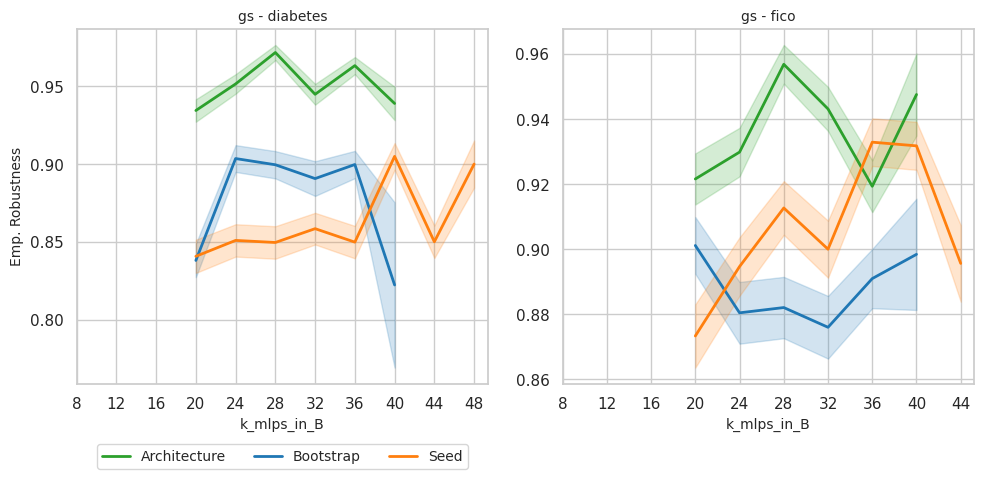

In [104]:
# Determine the number of unique base methods and datasets
base_methods = ksweep_agg_df["base_cf_method"].unique()
datasets = ksweep_agg_df["dataset_name"].unique()
n_rows = len(base_methods)
n_cols = len(datasets)

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), squeeze=False)

for i, base_method in enumerate(base_methods):
    for j, dataset in enumerate(datasets):
        ax = axs[i, j]
        df = ksweep_agg_df[
            (ksweep_agg_df["dataset_name"] == dataset)
            & (ksweep_agg_df["base_cf_method"] == base_method)
        ]
        for experiment_type in df["experiment_type"].unique():
            df_ex = df[df["experiment_type"] == experiment_type]
            ax.errorbar(
                df_ex["k_mlps_in_B"],
                df_ex["robustness"],
                label=experiment_type,
                color=colors[experiment_type],
                linewidth=2,
            )
            ax.fill_between(
                df_ex["k_mlps_in_B"],
                df_ex["robustness"]
                - Z_SCORE * df_ex["robustness_std"] / np.sqrt(df_ex["n"]),
                df_ex["robustness"]
                + Z_SCORE * df_ex["robustness_std"] / np.sqrt(df_ex["n"]),
                color=colors[experiment_type],
                alpha=0.2,
            )

        ax.set_xticks(sorted(df["k_mlps_in_B"].unique()))
        ax.set_title(f"{base_method} - {dataset}", fontsize=10)
        if j == 0:  # Only set ylabel for the leftmost column
            ax.set_ylabel("Emp. Robustness", fontsize=10)
        if i == n_rows - 1:  # Only set xlabel for the bottom row
            ax.set_xlabel("k_mlps_in_B", fontsize=10)

        # Set legend only for the first subplot
        if i == 0 and j == 0:
            ax.legend(
                loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=10
            )

plt.tight_layout()
plt.show()

In [105]:
brce_params_df_agg_by = [
    "dataset_name",
    "base_cf_method",
    "experiment_type",
    "delta_robustness",
    "beta_confidence",
]
brce_params_agg_df = (
    brce_params_df.groupby(brce_params_df_agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("robust_counterfactual_validity_model2", "mean"),
        robustness_std=("robust_counterfactual_validity_model2", "std"),
        proximityL1=("robust_counterfactual_proximityL1", "mean"),
        proximityL1_std=("robust_counterfactual_proximityL1", "std"),
        proximityL2=("robust_counterfactual_proximityL2", "mean"),
        proximityL2_std=("robust_counterfactual_proximityL2", "std"),
        plausibility=("robust_counterfactual_plausibility", "mean"),
        plausibility_std=("robust_counterfactual_plausibility", "std"),
        dpow=("robust_counterfactual_discriminative_power", "mean"),
        dpow_std=("robust_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

brce_params_agg_df.round(2).head()

,dataset_name,base_cf_method,experiment_type,delta_robustness,beta_confidence,n,vailidity,validity_std,robustness,robustness_std,proximityL1,proximityL1_std,proximityL2,proximityL2_std,plausibility,plausibility_std,dpow,dpow_std
0,breast_cancer,dice,Architecture,0.6,0.6,1500,1.0,0.0,0.94,0.24,3.13,1.88,1.12,0.39,1.12,0.32,0.36,0.25
1,breast_cancer,dice,Architecture,0.6,0.7,1500,1.0,0.0,0.94,0.24,3.21,1.91,1.13,0.40,1.13,0.33,0.38,0.25
2,breast_cancer,dice,Architecture,0.6,0.8,1500,1.0,0.0,0.94,0.23,3.20,1.91,1.13,0.40,1.13,0.33,0.37,0.25
3,breast_cancer,dice,Architecture,0.6,0.9,1491,1.0,0.0,0.95,0.23,3.30,1.95,1.14,0.40,1.13,0.33,0.39,0.25
4,breast_cancer,dice,Architecture,0.7,0.6,1500,1.0,0.0,0.95,0.21,3.39,1.97,1.15,0.40,1.14,0.34,0.40,0.25


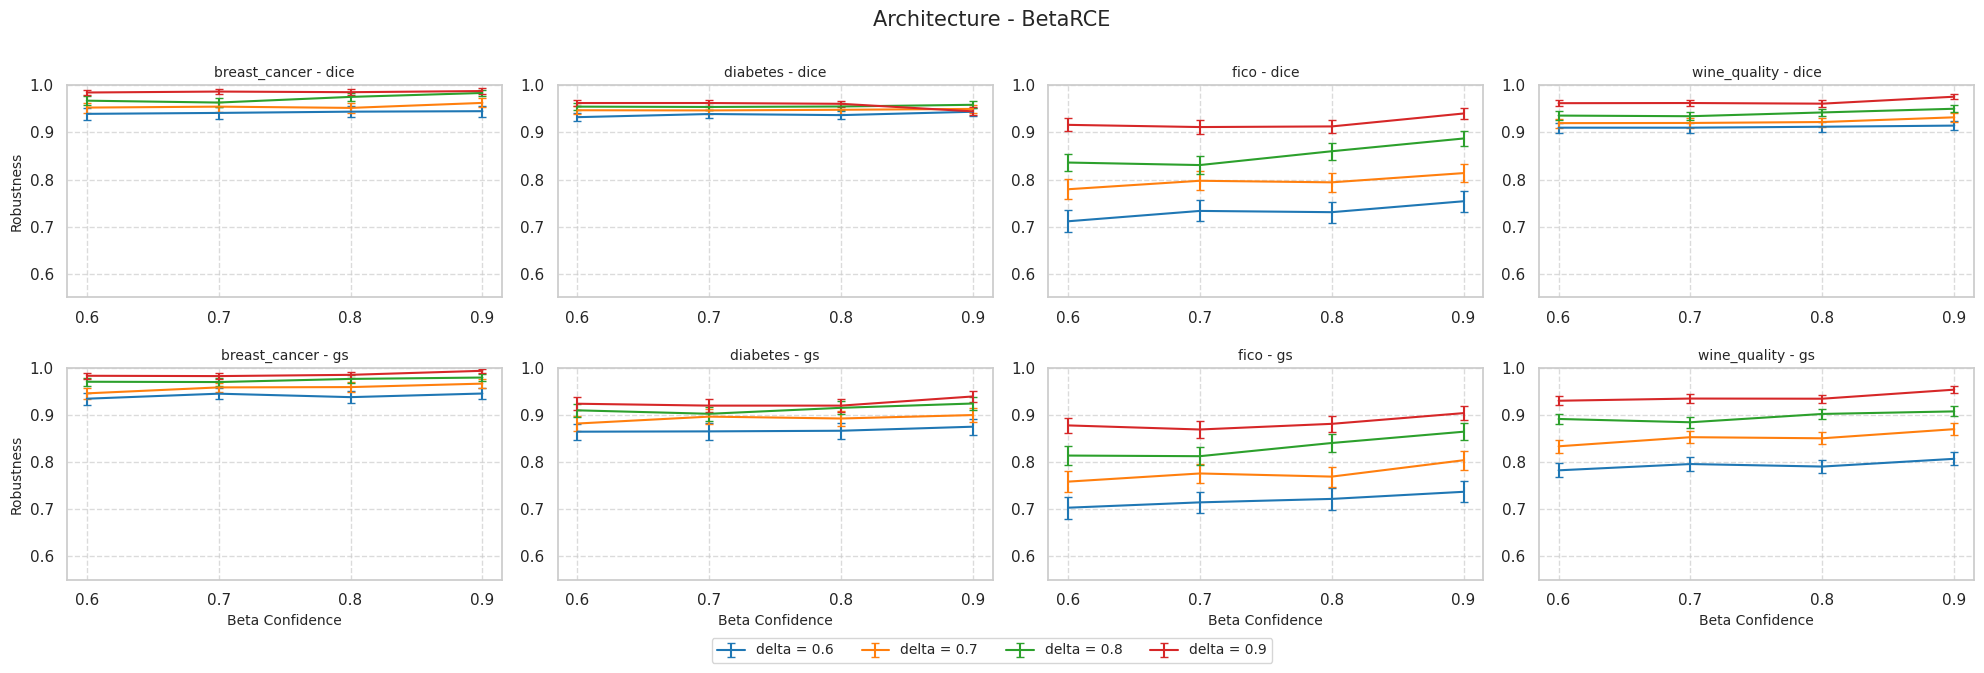

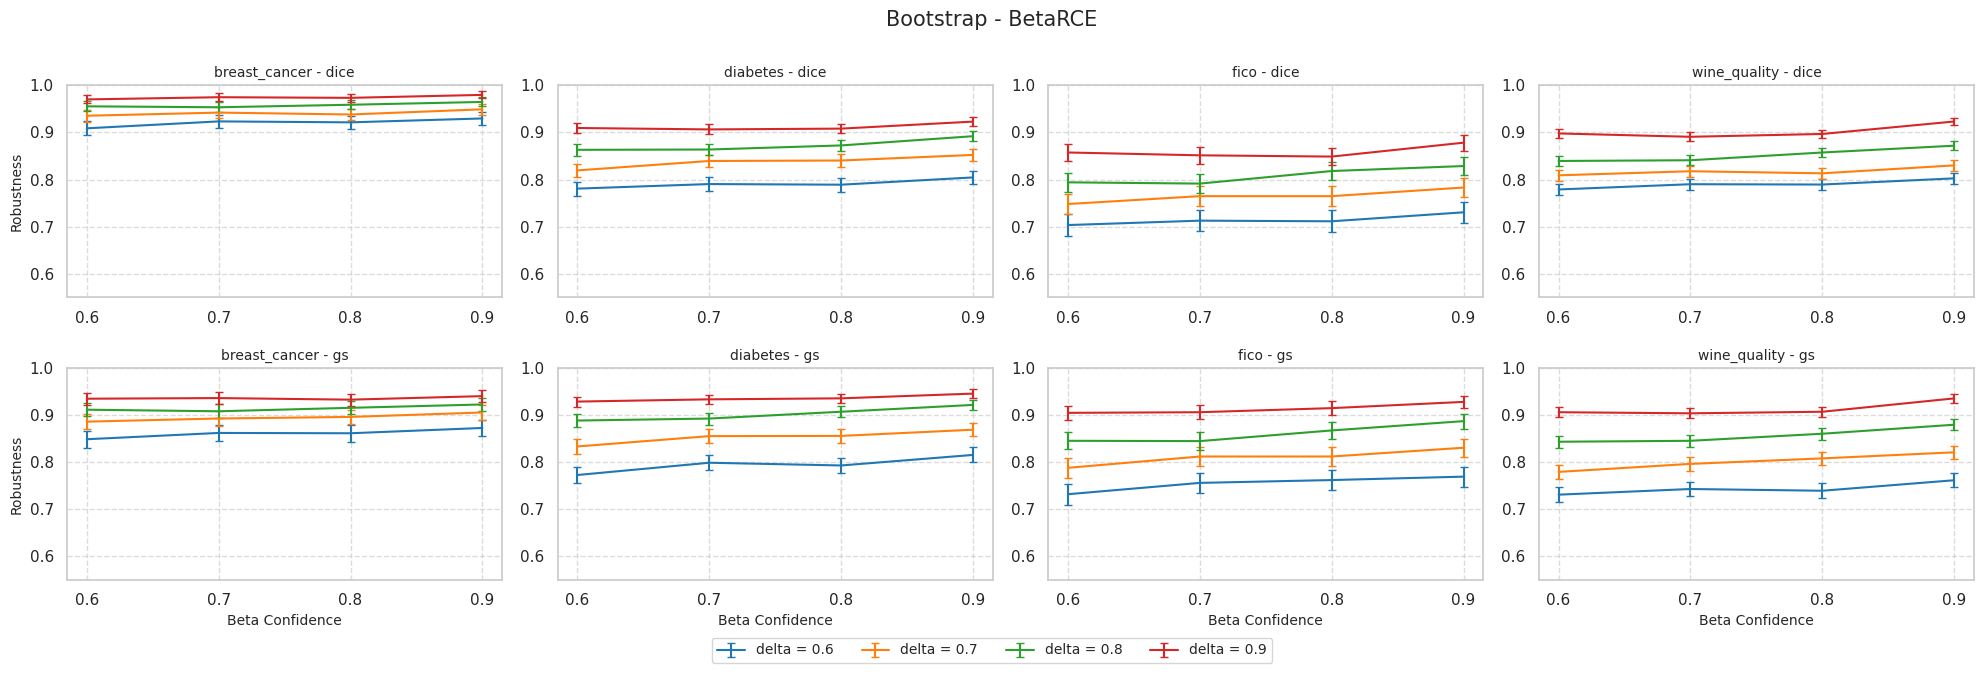

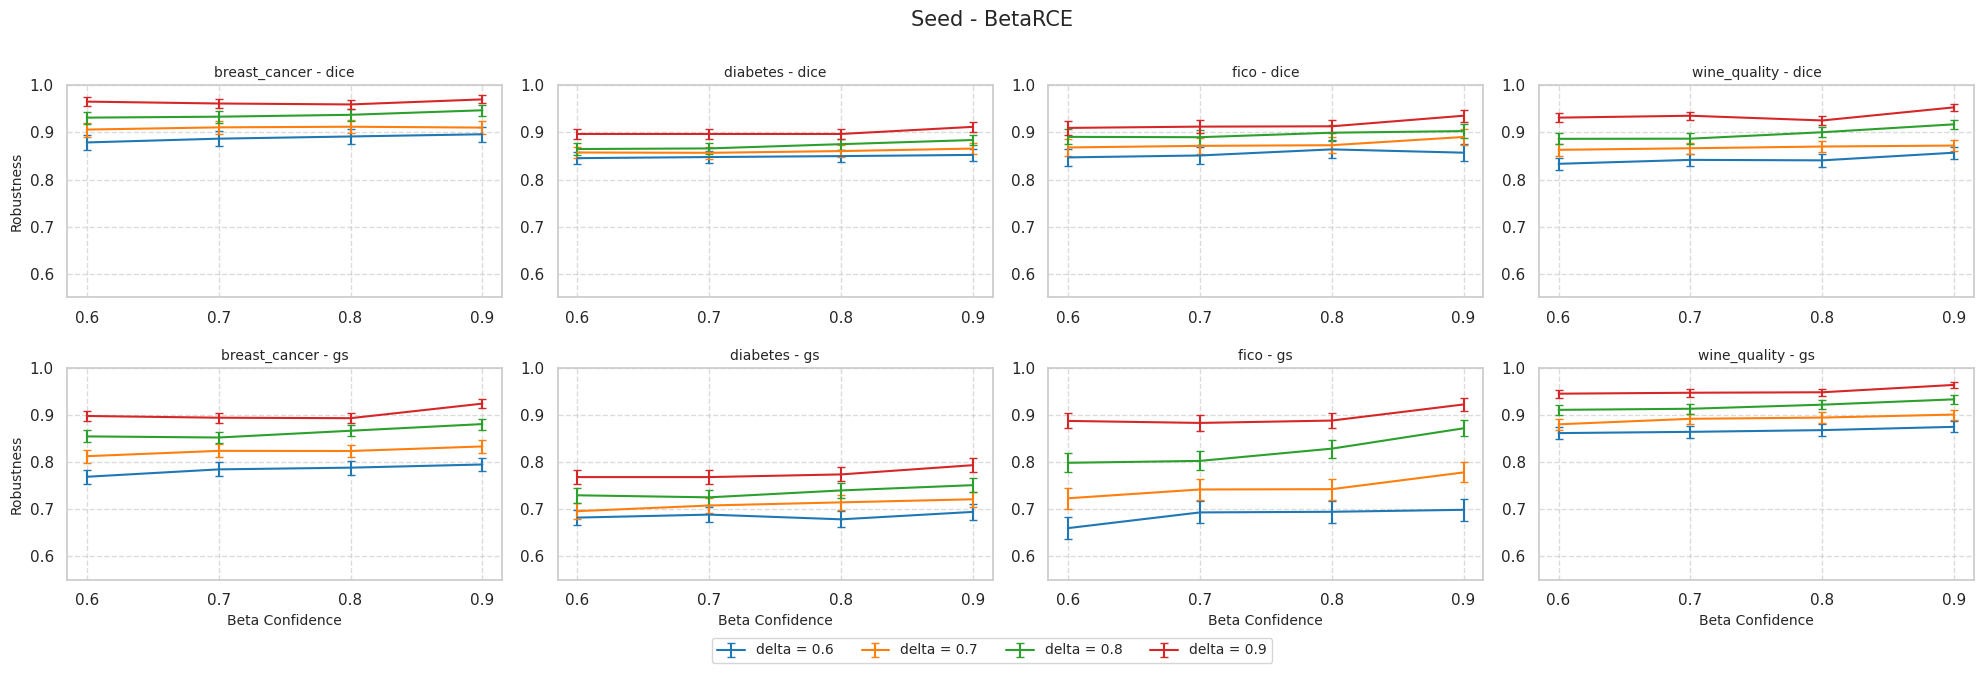

In [106]:
subdir = "confidence_sweep"
os.makedirs(f"{images_dir}/{subdir}", exist_ok=True)

# Get unique values
datasets = brce_params_agg_df["dataset_name"].unique()
base_methods = brce_params_agg_df["base_cf_method"].unique()
experiment_types = brce_params_agg_df["experiment_type"].unique()
delta_robustness_values = sorted(brce_params_agg_df["delta_robustness"].unique())

# Set up the plot
n_rows = len(base_methods)
n_cols = len(datasets)

colors = {l: c for l, c in zip(delta_robustness_values, colors_discrete)}

for exp_type in experiment_types:
    fig, axs = plt.subplots(
        n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows), squeeze=False
    )
    for i, base_method in enumerate(base_methods):
        for j, dataset in enumerate(datasets):
            ax = axs[i, j]
            for k, delta_rob in enumerate(delta_robustness_values):
                df_subset = brce_params_agg_df[
                    (brce_params_agg_df["dataset_name"] == dataset)
                    & (brce_params_agg_df["base_cf_method"] == base_method)
                    & (brce_params_agg_df["experiment_type"] == exp_type)
                    & (brce_params_agg_df["delta_robustness"] == delta_rob)
                ]

                if not df_subset.empty:
                    ax.errorbar(
                        df_subset["beta_confidence"],
                        df_subset["robustness"],
                        yerr=Z_SCORE
                        * df_subset["robustness_std"]
                        / np.sqrt(df_subset["n"]),
                        label=f"delta = {delta_rob}",
                        color=colors[delta_rob],
                        capsize=3,
                    )

            ax.set_xticks(sorted(df_subset["beta_confidence"].unique()))
            ax.set_title(f"{dataset} - {base_method}", fontsize=10)
            if j == 0:  # Only set ylabel for the leftmost column
                ax.set_ylabel("Robustness", fontsize=10)
            if i == n_rows - 1:  # Only set xlabel for the bottom row
                ax.set_xlabel("Beta Confidence", fontsize=10)

            ax.set_ylim(0.55, 1)  # Assuming robustness is between 0 and 1
            ax.grid(True, linestyle="--", alpha=0.7)

    # Create a single legend for the entire figure
    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="lower center",
        ncol=len(experiment_types) * len(delta_robustness_values),
        bbox_to_anchor=(0.5, -0.1),
        fontsize=10,
    )

    plt.suptitle(f"{exp_type} - BetaRCE", fontsize=15, y=1)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.05)  # Adjust to make room for the legend
    plt.savefig(f"{images_dir}/{subdir}/{exp_type}.png", bbox_inches="tight", dpi=150)
    plt.show()

In [115]:
raw_df = betarce_df[betarce_df["this_is_generalization"] == False].copy()

In [116]:
raw_df[raw_df["base_cf_method"] == "face"][
    "base_counterfactual_validity_model2"
].value_counts()

1.0    87337
0.0    35866
Name: base_counterfactual_validity_model2, dtype: int64

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[1] Does higher Beta lead to better empirical robustness?</div>

32.0    80669
Name: k_mlps_in_B, dtype: int64


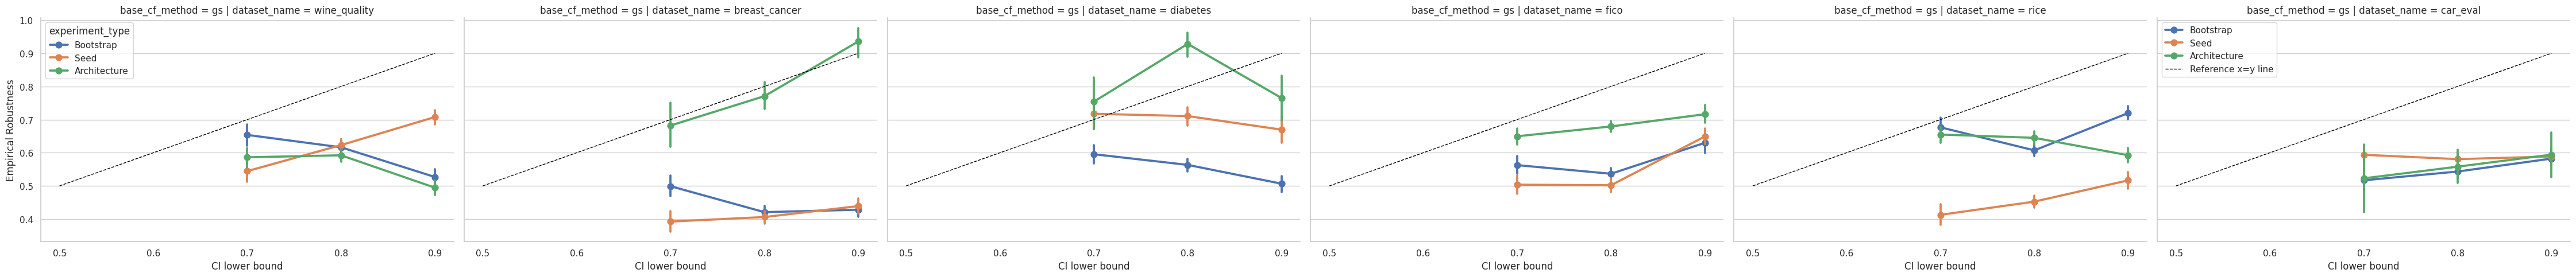

In [117]:
subdir = "rob_vs_ci_lower_bound"
os.makedirs(f"{images_dir}/{subdir}", exist_ok=True)

# Split by expeirment type (hue) and dataset (col)
# x-axis: lower bound discretized
# y-axis: average empirical robustness

_tmp_df = raw_df[raw_df["base_cf_method"] == "gs"].copy()
lb_threshs = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
_tmp_df["CI lower bound"] = pd.cut(
    _tmp_df["lower_bound_beta"], bins=lb_threshs, labels=lb_threshs[:-1]
)
_tmp_df["CI midpoint"] = (_tmp_df["lower_bound_beta"] + _tmp_df["upper_bound_beta"]) / 2
_tmp_df["CI midpoint"] = pd.cut(
    _tmp_df["CI midpoint"], bins=lb_threshs, labels=lb_threshs[:-1]
)
_tmp_df["Empirical Robustness"] = _tmp_df["base_counterfactual_validity_model2"].astype(
    float
)

# Drop rows with NaN values in 'Empirical Robustness'
_tmp_df = _tmp_df.dropna(subset=["Empirical Robustness"])

# Print counts for each k_mlps_in_B
print(_tmp_df["k_mlps_in_B"].value_counts())

g = sns.catplot(
    data=_tmp_df,
    x="CI lower bound",
    y="Empirical Robustness",
    hue="experiment_type",
    col="dataset_name",
    row="base_cf_method",
    kind="point",
    # palette=colors_discrete,
    # markers=markers,
    height=5,
    aspect=1.5,
    legend_out=False,
)
for ax in g.axes.flat:
    ax.plot(
        list(range(5)),
        lb_threshs[:-1],
        color="black",
        linestyle="--",
        linewidth=1,
        label="Reference x=y line",
    )

plt.legend()
plt.savefig(
    f"{images_dir}/{subdir}/1_robustness_vs_ci_lower_bound.png",
    dpi=300,
    bbox_inches="tight",
)

In [118]:
nn_gs_df = raw_df[
    (raw_df["model_type_to_use"] == "neural_network")
    & (raw_df["base_cf_method"] == "gs")
]
nn_dice_df = raw_df[
    (raw_df["model_type_to_use"] == "neural_network")
    & (raw_df["base_cf_method"] == "dice")
]
nn_face_df = raw_df[
    (raw_df["model_type_to_use"] == "neural_network")
    & (raw_df["base_cf_method"] == "face")
]
nn_df = raw_df[raw_df["model_type_to_use"] == "neural_network"]
dt_gs_df = raw_df[
    (raw_df["model_type_to_use"] == "DecisionTree")
    & (raw_df["base_cf_method"] == "GrowingSpheres")
]
dt_dice_df = raw_df[
    (raw_df["model_type_to_use"] == "DecisionTree")
    & (raw_df["base_cf_method"] == "Dice")
]
dt_df = raw_df[raw_df["model_type_to_use"] == "DecisionTree"]

print(
    f"Lengths of the dataframes: NN GS: {len(nn_gs_df)}, NN Dice: {len(nn_dice_df)}, NN Face: {len(nn_face_df)}, NN: {len(nn_df)}, DT GS: {len(dt_gs_df)}, DT Dice: {len(dt_dice_df)}, DT: {len(dt_df)}"
)

Lengths of the dataframes: NN GS: 113069, NN Dice: 124402, NN Face: 123203, NN: 360674, DT GS: 0, DT Dice: 0, DT: 0


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[2] Is the empirical validity δ-Robust?</div>

ValueError: x and y must have same first dimension, but have shapes (3,) and (2,)

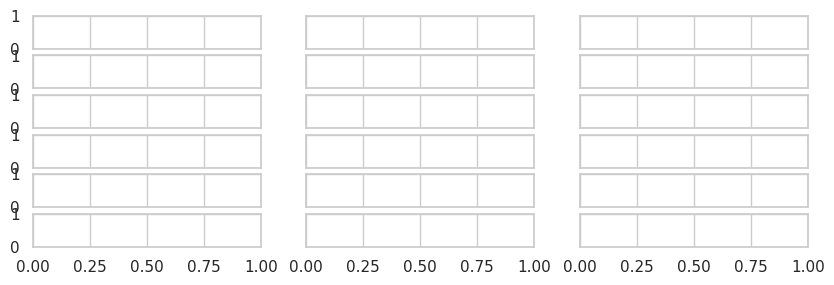

In [ ]:
# Use only matplotlib
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_df.copy()
method = "gs"

datasets = ["wine_quality", "diabetes", "fico", "breast_cancer", "rice", "car_eval"]
rename_Datasets = ["Wine", "Diabetes", "Heloc", "Br. Cancer", "Rice", "Car Eval"]

# datasets = ["diabetes", "wine_quality"]
# rename_Datasets = ["Diabetes", "Wine"]
_tmp_df["dataset_name"] = _tmp_df["dataset_name"].replace(
    dict(zip(datasets, rename_Datasets))
)
datasets = rename_Datasets

experiment_types = _tmp_df["experiment_type"].unique()
delta_robustness = _tmp_df["delta_robustness"].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
rows = max(2, len(datasets))
cols = max(2, len(experiment_types))
fig, axes = plt.subplots(
    nrows=rows, ncols=cols, figsize=(10, 3), sharex=True, sharey=True
)


for i, dataset in enumerate(datasets):
    for j, experiment_type in enumerate(experiment_types):
        _df_fil = _tmp_df[
            (_tmp_df["dataset_name"] == dataset)
            & (_tmp_df["experiment_type"] == experiment_type)
        ]
        _df = _df_fil[_df_fil["base_cf_method"] == method]

        data = _df.groupby("delta_robustness")[
            "robust_counterfactual_validity_model2"
        ].mean()

        ax = axes[i, j]
        ax.plot(
            delta_robustness,
            data,
            marker="o",
            linestyle="-",
            color="b",
            label="Empirical Robustness",
        )
        emprob_ci = (
            1.96
            * _df.groupby("delta_robustness")[
                "robust_counterfactual_validity_model2"
            ].std()
            / np.sqrt(
                _df.groupby("delta_robustness")[
                    "robust_counterfactual_validity_model2"
                ].count()
            )
        )
        ax.fill_between(
            delta_robustness,
            data - emprob_ci,
            data + emprob_ci,
            color="b",
            alpha=0.1,
            label="Empirical Robustness 95% CI",
        )

        # ax.set_title(f'{dataset} \n{experiment_type}')

        data_lower = _df.groupby("delta_robustness")["lower_bound_beta"].mean()
        data_upper = _df.groupby("delta_robustness")["upper_bound_beta"].mean()

        ax2 = ax.twinx()

        ax2.plot(
            delta_robustness,
            data_lower,
            marker="s",
            linestyle="--",
            color="r",
            label="CI Lower Bound",
        )
        # add yerr for lower bound
        lb_std = _df.groupby("delta_robustness")["lower_bound_beta"].std()
        ax2.fill_between(
            delta_robustness,
            data_lower - lb_std,
            data_lower + lb_std,
            color="r",
            alpha=0.1,
            label="CI Lower Bound Std",
        )

        ax2.plot(
            delta_robustness,
            data_upper,
            marker="s",
            linestyle="--",
            color="g",
            label="CI Upper Bound",
        )
        # add yerr
        ub_std = _df.groupby("delta_robustness")["upper_bound_beta"].std()
        ax2.fill_between(
            delta_robustness,
            data_upper - ub_std,
            data_upper + ub_std,
            color="g",
            alpha=0.1,
            label="CI Upper Bound Std",
        )

        # Plot baseline
        linestyles = [":", ":", ":"]
        markers = ["*", "v", "s"]
        for k, (m, color) in enumerate(
            zip(["gs", "dice", "face"], ["orange", "black", "gray"])
        ):
            __df = _df_fil[_df_fil["base_cf_method"] == m]
            base = __df["base_counterfactual_validity_model2"].mean()
            base_std = __df["base_counterfactual_validity_model2"].std()
            base_ci = (
                1.96
                * base_std
                / np.sqrt(__df["base_counterfactual_validity_model2"].count())
            )
            ax.plot(
                delta_robustness,
                [base] * len(delta_robustness),
                color=color,
                linestyle=linestyles[k],
                label=f"{m} CF",
                marker=markers[k],
                alpha=0.5,
            )
            ax.fill_between(
                delta_robustness,
                base - base_ci,
                base + base_ci,
                color=color,
                alpha=0.1,
                label=f"{m} CF 95% CI",
            )

        l = 0.4
        ax.set_ylim(l, 1)
        ax2.set_ylim(l, 1)
        ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
        ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
        ax2.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

        # Decrease font size of the labels
        ax.tick_params(axis="both", which="major", labelsize=10)
        ax2.tick_params(axis="both", which="major", labelsize=10)

        # Turn off label ticks for ax2 on the plots that are not on the right
        if j != len(experiment_types) - 1:
            ax2.set_yticklabels([])

        # Remove the outline of the plot
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)

        ax.tick_params(axis="both", which="both", length=0)
        ax2.tick_params(axis="both", which="both", length=0)

        # Change ticks fontsize
        ax.tick_params(axis="both", which="major", labelsize=8)
        ax2.tick_params(axis="both", which="major", labelsize=8)

        # Remove grid
        ax.grid(False)

        handles, labels = ax.get_legend_handles_labels()
        handles_2, labels_2 = ax2.get_legend_handles_labels()

        handles_combined = handles + handles_2
        labels_combined = labels + labels_2

fig.text(0.5, 0.02, "delta", ha="center", fontsize=10)
fig.text(
    0.06, 0.5, "Empirical robustness", va="center", rotation="vertical", fontsize=10
)
fig.text(
    0.94, 0.5, "Credible interval bounds", va="center", rotation="vertical", fontsize=10
)
# Create one legend for the entire figure
fig.legend(
    handles_combined, labels_combined, bbox_to_anchor=(0.94, 0.02), ncol=5, fontsize=8
)

# Set titles for the rows with the dataset names
for ax, row in zip(axes[:, 0], datasets):
    rowlen = len(row)
    fig.text(
        ax.get_position().x0 - 0.035,
        ax.get_position().y0 + 0.6 * (1 / rowlen),
        row,
        ha="center",
        rotation="vertical",
        fontsize=10,
    )

# Set titles for the columns
for ax, col in zip(axes[0], experiment_types):
    fig.text(
        ax.get_position().x0 + 0.12,
        ax.get_position().y1 + 0.02,
        col,
        ha="center",
        fontsize=10,
    )


plt.savefig(
    f"{images_dir}/{subdir}2_empirical_robustness_ci_bounds_paper.png",
    dpi=300,
    bbox_inches="tight",
)

# plt.tight_layout()
plt.show()


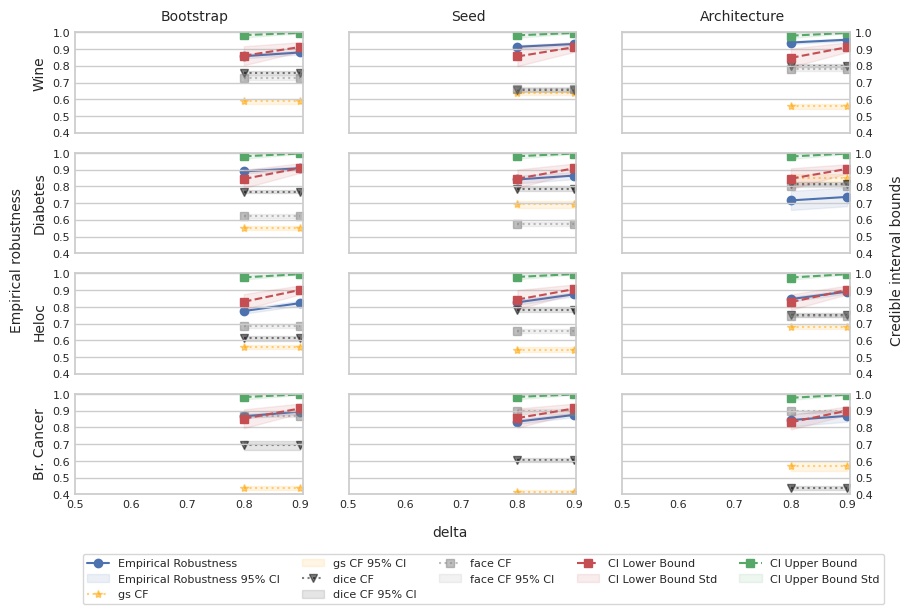

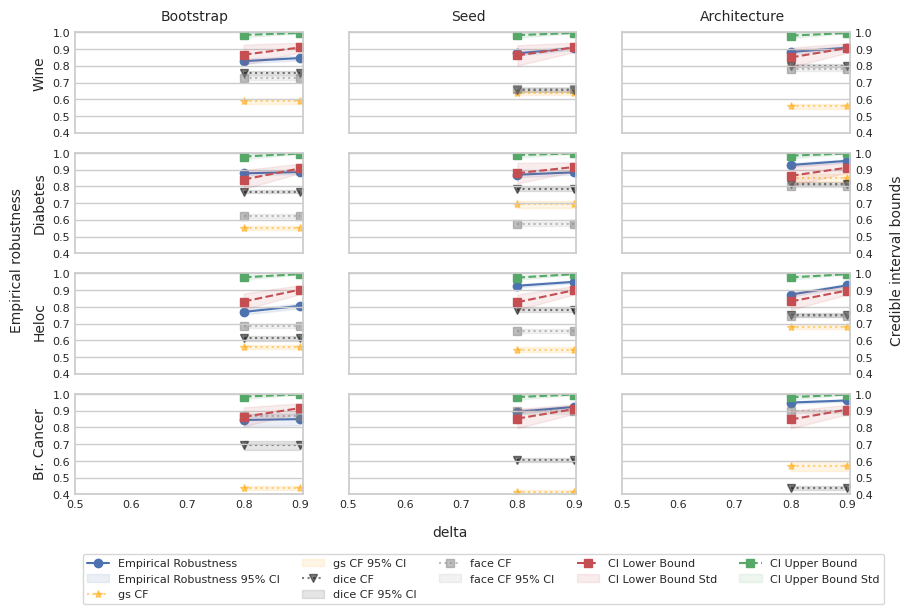

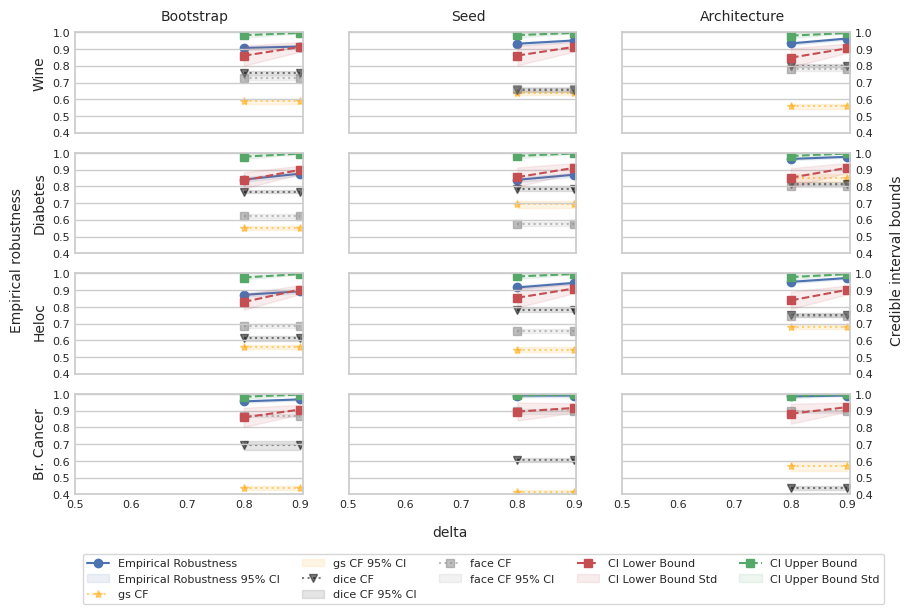

In [ ]:
# Use only matplotlib
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_df.copy()

datasets = ["wine_quality", "diabetes", "fico", "breast_cancer"]
rename_Datasets = ["Wine", "Diabetes", "Heloc", "Br. Cancer"]

_tmp_df["dataset_name"] = _tmp_df["dataset_name"].replace(
    dict(zip(datasets, rename_Datasets))
)
datasets = rename_Datasets

experiment_types = _tmp_df["experiment_type"].unique()
delta_robustness = _tmp_df["delta_robustness"].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
rows = max(2, len(datasets))
cols = max(2, len(experiment_types))


for method in ["gs", "dice", "face"]:
    fig, axes = plt.subplots(
        nrows=rows, ncols=cols, figsize=(10, 6), sharex=True, sharey=True
    )

    for i, dataset in enumerate(datasets):
        for j, experiment_type in enumerate(experiment_types):
            _df_fil = _tmp_df[
                (_tmp_df["dataset_name"] == dataset)
                & (_tmp_df["experiment_type"] == experiment_type)
            ]
            _df = _df_fil[_df_fil["base_cf_method"] == method]

            data = _df.groupby("delta_robustness")[
                "robust_counterfactual_validity_model2"
            ].mean()

            ax = axes[i, j]
            ax.plot(
                delta_robustness,
                data,
                marker="o",
                linestyle="-",
                color="b",
                label="Empirical Robustness",
            )
            emprob_ci = (
                1.96
                * _df.groupby("delta_robustness")[
                    "robust_counterfactual_validity_model2"
                ].std()
                / np.sqrt(
                    _df.groupby("delta_robustness")[
                        "robust_counterfactual_validity_model2"
                    ].count()
                )
            )
            ax.fill_between(
                delta_robustness,
                data - emprob_ci,
                data + emprob_ci,
                color="b",
                alpha=0.1,
                label="Empirical Robustness 95% CI",
            )

            # ax.set_title(f'{dataset} \n{experiment_type}')

            data_lower = _df.groupby("delta_robustness")["lower_bound_beta"].mean()
            data_upper = _df.groupby("delta_robustness")["upper_bound_beta"].mean()

            ax2 = ax.twinx()

            ax2.plot(
                delta_robustness,
                data_lower,
                marker="s",
                linestyle="--",
                color="r",
                label="CI Lower Bound",
            )
            # add yerr for lower bound
            lb_std = _df.groupby("delta_robustness")["lower_bound_beta"].std()
            ax2.fill_between(
                delta_robustness,
                data_lower - lb_std,
                data_lower + lb_std,
                color="r",
                alpha=0.1,
                label="CI Lower Bound Std",
            )

            ax2.plot(
                delta_robustness,
                data_upper,
                marker="s",
                linestyle="--",
                color="g",
                label="CI Upper Bound",
            )
            # add yerr
            ub_std = _df.groupby("delta_robustness")["upper_bound_beta"].std()
            ax2.fill_between(
                delta_robustness,
                data_upper - ub_std,
                data_upper + ub_std,
                color="g",
                alpha=0.1,
                label="CI Upper Bound Std",
            )

            # Plot baseline
            linestyles = [":", ":", ":"]
            markers = ["*", "v", "s"]
            for k, (m, color) in enumerate(
                zip(["gs", "dice", "face"], ["orange", "black", "gray"])
            ):
                __df = _df_fil[_df_fil["base_cf_method"] == m]
                base = __df["base_counterfactual_validity_model2"].mean()
                base_std = __df["base_counterfactual_validity_model2"].std()
                base_ci = (
                    1.96
                    * base_std
                    / np.sqrt(__df["base_counterfactual_validity_model2"].count())
                )
                ax.plot(
                    delta_robustness,
                    [base] * len(delta_robustness),
                    color=color,
                    linestyle=linestyles[k],
                    label=f"{m} CF",
                    marker=markers[k],
                    alpha=0.5,
                )
                ax.fill_between(
                    delta_robustness,
                    base - base_ci,
                    base + base_ci,
                    color=color,
                    alpha=0.1,
                    label=f"{m} CF 95% CI",
                )

            l = 0.4
            ax.set_ylim(l, 1)
            ax2.set_ylim(l, 1)
            ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
            ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
            ax2.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

            # Decrease font size of the labels
            ax.tick_params(axis="both", which="major", labelsize=10)
            ax2.tick_params(axis="both", which="major", labelsize=10)

            # Turn off label ticks for ax2 on the plots that are not on the right
            if j != len(experiment_types) - 1:
                ax2.set_yticklabels([])

            # Remove the outline of the plot
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_visible(False)
            ax.spines["bottom"].set_visible(False)

            ax.tick_params(axis="both", which="both", length=0)
            ax2.tick_params(axis="both", which="both", length=0)

            # Change ticks fontsize
            ax.tick_params(axis="both", which="major", labelsize=8)
            ax2.tick_params(axis="both", which="major", labelsize=8)

            # Remove grid
            ax.grid(False)

            handles, labels = ax.get_legend_handles_labels()
            handles_2, labels_2 = ax2.get_legend_handles_labels()

            handles_combined = handles + handles_2
            labels_combined = labels + labels_2

    fig.text(0.5, 0.04, "delta", ha="center", fontsize=10)
    fig.text(
        0.06, 0.5, "Empirical robustness", va="center", rotation="vertical", fontsize=10
    )
    fig.text(
        0.94,
        0.5,
        "Credible interval bounds",
        va="center",
        rotation="vertical",
        fontsize=10,
    )
    # Create one legend for the entire figure
    fig.legend(
        handles_combined,
        labels_combined,
        bbox_to_anchor=(0.94, 0.02),
        ncol=5,
        fontsize=8,
    )

    # Set titles for the rows with the dataset names
    for ax, row in zip(axes[:, 0], datasets):
        rowlen = len(row)
        fig.text(
            ax.get_position().x0 - 0.035,
            ax.get_position().y0 + 0.3 * (1 / rowlen),
            row,
            ha="center",
            rotation="vertical",
            fontsize=10,
        )

    # Set titles for the columns
    for ax, col in zip(axes[0], experiment_types):
        fig.text(
            ax.get_position().x0 + 0.12,
            ax.get_position().y1 + 0.02,
            col,
            ha="center",
            fontsize=10,
        )

    plt.savefig(
        f"{images_dir}/2_empirical_robustness_ci_bounds_{method}.png",
        dpi=300,
        bbox_inches="tight",
    )

    # plt.tight_layout()
    plt.show()
    plt.close()

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[3] Comparision to RobX</div>

In [120]:
robx_raw_df = robx_df.copy()

In [121]:
robx_raw_df.head(3)

,Unnamed: 0,base_cf_method,model_type_to_use,experiment_type,dataset_name,just_base_cf,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,config,robust_cf_method,start_sample_passes_test,counterfactual_does_not_pass_test,counterfactual_does_not_have_target_class,counterfactual_is_nan,highest_delta,robust_cf_hp_name
0,0,gs,neural_network,Bootstrap,wine_quality,False,32,1,Bootstrap,0.4,0.01,Model2_1,[0.28333333 0.472 0.15662651 0.04715128 0...,0,0.241079,0,0.196259,0,[0.30043924 0.4076634 0.10792961 0.04065591 0...,0.6027,1.0,0.397901,0.0,1.0,0.283886,0.109673,0.370831,0.4,0.0,0.003646,[0.30804275 0.28787001 0.24929805 0.07499801 0...,0.866763,1.0,0.886415,1.0,1.0,0.561883,0.237183,0.324035,0.266667,1.0,0.504585,0.042058,0.080599,None,robx,NaN,NaN,NaN,NaN,NaN,robxbeta_confidence=0.4-delta_robustness=0.01
1,1,gs,neural_network,Bootstrap,wine_quality,False,32,1,Bootstrap,0.4,0.01,Model2_2,[0.28333333 0.472 0.15662651 0.04715128 0...,0,0.241079,0,0.276227,0,[0.30043924 0.4076634 0.10792961 0.04065591 0...,0.6027,1.0,0.639136,1.0,1.0,0.283886,0.109673,0.370831,0.4,1.0,0.003646,[0.30708453 0.30296668 0.23148244 0.07067013 0...,0.843937,1.0,0.684386,1.0,1.0,0.503439,0.214592,0.324837,0.266667,1.0,0.440996,0.032126,0.099197,None,robx,NaN,NaN,NaN,NaN,NaN,robxbeta_confidence=0.4-delta_robustness=0.01
2,2,gs,neural_network,Bootstrap,wine_quality,False,32,1,Bootstrap,0.4,0.01,Model2_3,[0.28333333 0.472 0.15662651 0.04715128 0...,0,0.241079,0,0.027361,0,[0.30043924 0.4076634 0.10792961 0.04065591 0...,0.6027,1.0,0.037830,0.0,1.0,0.283886,0.109673,0.370831,0.4,0.0,0.003646,[0.30708453 0.30296668 0.23148244 0.07067013 0...,0.843937,1.0,0.216759,0.0,1.0,0.503439,0.214592,0.324837,0.266667,0.0,0.440996,0.032126,0.100304,None,robx,NaN,NaN,NaN,NaN,NaN,robxbeta_confidence=0.4-delta_robustness=0.01


In [122]:
robx_raw_df.rename(
    columns={"beta_confidence": "tau", "delta_robustness": "variance"}, inplace=True
)
robx_raw_df.head()

,Unnamed: 0,base_cf_method,model_type_to_use,experiment_type,dataset_name,just_base_cf,k_mlps_in_B,fold_i,experiment_generalization_type,tau,variance,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,config,robust_cf_method,start_sample_passes_test,counterfactual_does_not_pass_test,counterfactual_does_not_have_target_class,counterfactual_is_nan,highest_delta,robust_cf_hp_name
0,0,gs,neural_network,Bootstrap,wine_quality,False,32,1,Bootstrap,0.4,0.01,Model2_1,[0.28333333 0.472 0.15662651 0.04715128 0...,0,0.241079,0,0.196259,0,[0.30043924 0.4076634 0.10792961 0.04065591 0...,0.6027,1.0,0.397901,0.0,1.0,0.283886,0.109673,0.370831,0.4,0.0,0.003646,[0.30804275 0.28787001 0.24929805 0.07499801 0...,0.866763,1.0,0.886415,1.0,1.0,0.561883,0.237183,0.324035,0.266667,1.0,0.504585,0.042058,0.080599,None,robx,NaN,NaN,NaN,NaN,NaN,robxbeta_confidence=0.4-delta_robustness=0.01
1,1,gs,neural_network,Bootstrap,wine_quality,False,32,1,Bootstrap,0.4,0.01,Model2_2,[0.28333333 0.472 0.15662651 0.04715128 0...,0,0.241079,0,0.276227,0,[0.30043924 0.4076634 0.10792961 0.04065591 0...,0.6027,1.0,0.639136,1.0,1.0,0.283886,0.109673,0.370831,0.4,1.0,0.003646,[0.30708453 0.30296668 0.23148244 0.07067013 0...,0.843937,1.0,0.684386,1.0,1.0,0.503439,0.214592,0.324837,0.266667,1.0,0.440996,0.032126,0.099197,None,robx,NaN,NaN,NaN,NaN,NaN,robxbeta_confidence=0.4-delta_robustness=0.01
2,2,gs,neural_network,Bootstrap,wine_quality,False,32,1,Bootstrap,0.4,0.01,Model2_3,[0.28333333 0.472 0.15662651 0.04715128 0...,0,0.241079,0,0.027361,0,[0.30043924 0.4076634 0.10792961 0.04065591 0...,0.6027,1.0,0.037830,0.0,1.0,0.283886,0.109673,0.370831,0.4,0.0,0.003646,[0.30708453 0.30296668 0.23148244 0.07067013 0...,0.843937,1.0,0.216759,0.0,1.0,0.503439,0.214592,0.324837,0.266667,0.0,0.440996,0.032126,0.100304,None,robx,NaN,NaN,NaN,NaN,NaN,robxbeta_confidence=0.4-delta_robustness=0.01
3,3,gs,neural_network,Bootstrap,wine_quality,False,32,1,Bootstrap,0.4,0.01,Model2_4,[0.28333333 0.472 0.15662651 0.04715128 0...,0,0.241079,0,0.076917,0,[0.30043924 0.4076634 0.10792961 0.04065591 0...,0.6027,1.0,0.133258,0.0,1.0,0.283886,0.109673,0.370831,0.4,0.0,0.003646,[0.30601985 0.31974075 0.21168732 0.06586137 0...,0.813673,1.0,0.760508,1.0,1.0,0.443314,0.190464,0.327800,0.266667,1.0,0.370342,0.022656,0.097067,None,robx,NaN,NaN,NaN,NaN,NaN,robxbeta_confidence=0.4-delta_robustness=0.01
4,4,gs,neural_network,Bootstrap,wine_quality,False,32,1,Bootstrap,0.4,0.01,Model2_5,[0.28333333 0.472 0.15662651 0.04715128 0...,0,0.241079,0,0.009665,0,[0.30043924 0.4076634 0.10792961 0.04065591 0...,0.6027,1.0,0.130403,0.0,1.0,0.283886,0.109673,0.370831,0.4,0.0,0.003646,[0.30708453 0.30296668 0.23148244 0.07067013 0...,0.843937,1.0,0.562175,1.0,1.0,0.503439,0.214592,0.324837,0.266667,1.0,0.440996,0.032126,0.100835,None,robx,NaN,NaN,NaN,NaN,NaN,robxbeta_confidence=0.4-delta_robustness=0.01


In [123]:
robx_nn_gs_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "neural_network")
    & (robx_raw_df["base_cf_method"] == "gs")
]
robx_nn_dice_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "neural_network")
    & (robx_raw_df["base_cf_method"] == "dice")
]
robx_nn_face_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "neural_network")
    & (robx_raw_df["base_cf_method"] == "face")
]
robx_nn_df = robx_raw_df[robx_raw_df["model_type_to_use"] == "neural_network"]
robx_dt_gs_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "DecisionTree")
    & (robx_raw_df["base_cf_method"] == "gs")
]
robx_dt_dice_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "DecisionTree")
    & (robx_raw_df["base_cf_method"] == "dice")
]
robx_dt_df = robx_raw_df[robx_raw_df["model_type_to_use"] == "DecisionTree"]

print(
    f"Lengths of the dataframes: NN GS: {len(robx_nn_gs_df)}, NN Dice: {len(robx_nn_dice_df)}, NN Face: {len(robx_nn_face_df)}, NN: {len(robx_nn_df)}, DT GS: {len(robx_dt_gs_df)}, DT Dice: {len(robx_dt_dice_df)}, DT: {len(robx_dt_df)}"
)

Lengths of the dataframes: NN GS: 302400, NN Dice: 302400, NN Face: 302400, NN: 907200, DT GS: 0, DT Dice: 0, DT: 0


In [196]:
method = "face"
tables_dir = f"{images_dir}/tables/{method}"
os.makedirs(tables_dir, exist_ok=True)

if method == "dice":
    _robx_df = robx_nn_dice_df.copy()
    _betarob_df = nn_dice_df.copy()
elif method == "gs":
    _robx_df = robx_nn_gs_df.copy()
    _betarob_df = nn_gs_df.copy()
elif method == "face":
    _robx_df = robx_nn_face_df.copy()
    _betarob_df = nn_face_df.copy()
else:
    raise ValueError(f"Method {method} not recognized.")

_method_df = just_base_df.copy()

columns_to_keep = [
    "dataset_name",
    "experiment_type",
    "method_name",
    "robust_counterfactual_validity_model2",
    "robust_counterfactual_L1_distance_from_base_cf",
    "robust_counterfactual_proximityL1",
    "robust_counterfactual_proximityL2",
    "robust_counterfactual_plausibility",
    "robust_counterfactual_discriminative_power",
    "robust_counterfactual_time",
]

columns_to_keep_bs = [
    "dataset_name",
    "experiment_type",
    "method_name",
    "base_counterfactual_validity_model2",
    "robust_counterfactual_L1_distance_from_base_cf",
    "base_counterfactual_proximityL1",
    "base_counterfactual_proximityL2",
    "base_counterfactual_plausibility",
    "base_counterfactual_discriminative_power",
    "base_counterfactual_time",
]

rename_names = [
    "Dataset",
    "Experiment Type",
    "Method",
    "Empirical Robustness",
    "Distance to Base",
    "Proximity L1",
    "Proximity L2",
    "Plausibility",
    "Discriminative Power",
    "Time (s)",
]

# Process the dataframes
_robx_df["method_name"] = (
    "RobX"
    + "("
    + _robx_df["tau"].astype(str)
    + ","
    + _robx_df["variance"].astype(str)
    + ")"
)
_robx_df = _robx_df[columns_to_keep].rename(
    columns=dict(zip(columns_to_keep, rename_names))
)

_betarob_df["method_name"] = (
    "BetaRCE"
    + "("
    + _betarob_df["delta_robustness"].astype(str)
    + ","
    + _betarob_df["beta_confidence"].astype(str)
    + ")"
)
_betarob_df = _betarob_df[columns_to_keep].rename(
    columns=dict(zip(columns_to_keep, rename_names))
)

_method_df["method_name"] = _method_df["base_cf_method"]
_method_df = _method_df[columns_to_keep_bs].rename(
    columns=dict(zip(columns_to_keep_bs, rename_names))
)

datasets = _robx_df["Dataset"].unique()
experiment_types = _robx_df["Experiment Type"].unique()

In [197]:
_method_df.head()

,Dataset,Experiment Type,Method,Empirical Robustness,Distance to Base,Proximity L1,Proximity L2,Plausibility,Discriminative Power,Time (s)
0,fico,Seed,dice,0.0,NaN,1.79026,1.274563,1.040331,0.6,0.391882
1,fico,Seed,dice,0.0,NaN,1.79026,1.274563,1.040331,0.6,0.391882
2,fico,Seed,dice,1.0,NaN,1.79026,1.274563,1.040331,0.6,0.391882
3,fico,Seed,dice,1.0,NaN,1.79026,1.274563,1.040331,0.6,0.391882
4,fico,Seed,dice,0.0,NaN,1.79026,1.274563,1.040331,0.6,0.391882


In [198]:
metrics = [
    "Distance to Base",
    "Proximity L1",
    "Proximity L2",
    "Plausibility",
    "Discriminative Power",
    "Time (s)",
]

groupby = ["Dataset", "Experiment Type", "Method"]
groupby_metrics = ["Dataset", "Method"]
# keep_robx = ['RobX(0.5,0.01)', 'RobX(0.5,0.1)', 'RobX(0.7,0.01)', 'RobX(0.7,0.1)']
# baselines = ['GrowingSpheres', 'Dice']
# keepRCE = ['BetaRCE(0.6,0.95)', 'BetaRCE(0.7,0.95)', 'BetaRCE(0.8,0.95)', 'BetaRCE(0.9,0.95)']


# -- ROBX --
robx_grouped = _robx_df.groupby(groupby).mean(numeric_only=False)
# robx_grouped = robx_grouped[robx_grouped.index.get_level_values('Method')]

print(robx_grouped)


# Empirical
robx_grouped_emp = robx_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
robx_grouped_method = robx_grouped.groupby(groupby_metrics)[metrics].mean(
    numeric_only=False
)
robx_grouped_method["Experiment Type"] = ["-"] * len(robx_grouped_method)
robx_grouped_method = robx_grouped_method.set_index(["Experiment Type"], append=True)
robx_grouped_method = robx_grouped_method.reorder_levels([0, 2, 1])


# -- Baselines --
method_grouped = _method_df.groupby(groupby)
method_grouped = method_grouped.mean(numeric_only=False)
# method_grouped = method_grouped[method_grouped.index.get_level_values('Method').isin(baselines)]
# Empirical
method_grouped_emp = method_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
method_grouped_method = method_grouped.groupby(groupby_metrics)[metrics].mean(
    numeric_only=False
)
method_grouped_method["Experiment Type"] = ["-"] * len(method_grouped_method)
method_grouped_method = method_grouped_method.set_index(
    ["Experiment Type"], append=True
)
method_grouped_method = method_grouped_method.reorder_levels([0, 2, 1])

# -- RCE --
rce_grouped = _betarob_df.groupby(groupby)
rce_grouped = rce_grouped.mean(numeric_only=False)
# rce_grouped = rce_grouped[rce_grouped.index.get_level_values('Method').isin(keepRCE)]
# Empirical
rce_grouped_emp = rce_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
rce_grouped_method = rce_grouped[metrics]
# rce_grouped_method = rce_grouped_method.loc[(slice(None), slice(None), keepRCE), :]


# CONCAT
all_emp = pd.concat([method_grouped_emp, robx_grouped_emp, rce_grouped_emp]).sort_index(
    level=0, sort_remaining=False
)
all_emp.to_csv(f"{tables_dir}/all_emp.csv")
met_emp = pd.concat(
    [method_grouped_method, robx_grouped_method, rce_grouped_method]
).sort_index(level=0)
met_emp.to_csv(f"{tables_dir}/all_met.csv")

                                              Empirical Robustness  \
Dataset       Experiment Type Method                                 
breast_cancer Architecture    RobX(0.4,0.01)              0.996222   
                              RobX(0.5,0.01)              0.998000   
                              RobX(0.6,0.01)              1.000000   
                              RobX(0.7,0.01)              1.000000   
                              RobX(0.8,0.01)              1.000000   
              Bootstrap       RobX(0.4,0.01)              0.969556   
                              RobX(0.5,0.01)              0.984000   
                              RobX(0.6,0.01)              0.992667   
                              RobX(0.7,0.01)              0.998472   
                              RobX(0.8,0.01)              1.000000   
              Seed            RobX(0.4,0.01)              0.915333   
                              RobX(0.5,0.01)              0.942444   
                    

In [199]:
all_emp

Experiment Type                 Architecture  Bootstrap      Seed
Dataset       Method                                             
breast_cancer dice                  0.559053   0.595610  0.505336
              face                  0.929926   0.867852  0.904815
              gs                    0.542963   0.537407  0.472222
              rbr                   0.376598   0.342551  0.352209
              roar                  0.386481   0.384156  0.378230
...                                      ...        ...       ...
wine_quality  RobX(0.6,0.01)        1.000000   0.995333  0.998444
              RobX(0.7,0.01)        1.000000   0.997083  1.000000
              RobX(0.8,0.01)        1.000000   0.960667  1.000000
              BetaRCE(0.8,0.9)      0.934444   0.907037  0.932593
              BetaRCE(0.9,0.9)      0.963704   0.915926  0.951852

[66 rows x 3 columns]

In [200]:
met_emp.head(20)

Distance to Base  \
Dataset       Experiment Type Method                               
breast_cancer -               RobX(0.4,0.01)            0.309634   
                              RobX(0.5,0.01)            0.508760   
                              RobX(0.6,0.01)            0.743815   
                              RobX(0.7,0.01)            0.998628   
                              RobX(0.8,0.01)            1.295147   
                              dice                           NaN   
                              face                           NaN   
                              gs                             NaN   
                              rbr                            NaN   
                              roar                           NaN   
              Architecture    BetaRCE(0.8,0.9)          0.422964   
                              BetaRCE(0.9,0.9)          0.506322   
              Bootstrap       BetaRCE(0.8,0.9)          0.471468   
                              BetaRCE(0.9,0.9)          0.658144   
              Seed            BetaRCE(0.8,0.9)          0.057657   
                              BetaRCE(0.9,0.9)          0.098946   
car_eval      -               dice                           NaN   
                              face                           NaN   
                              gs                             NaN   
                              rbr                            NaN   

                                                Proximity L1  Proximity L2  \
Dataset       Experiment Type Method                                         
breast_cancer -               RobX(0.4,0.01)        3.343375      0.762141   
                              RobX(0.5,0.01)        3.430010      0.780484   
                              RobX(0.6,0.01)        3.543084      0.805848   
                              RobX(0.7,0.01)        3.738035      0.851526   
                              RobX(0.8,0.01)        3.904813      0.884682   
                              dice                  1.623368      1.015631   
                              face                  3.426513      0.784767   
                              gs                    3.086172      0.700842   
                              rbr                   2.652616      0.616906   
                              roar                  9.270563      2.057257   
              Architecture    BetaRCE(0.8,0.9)      3.595797      0.817329   
                              BetaRCE(0.9,0.9)      3.642601      0.835207   
              Bootstrap       BetaRCE(0.8,0.9)      3.472961      0.786558   
                              BetaRCE(0.9,0.9)      3.571578      0.807335   
              Seed            BetaRCE(0.8,0.9)      3.316975      0.764105   
                              BetaRCE(0.9,0.9)      3.390767      0.780105   
car_eval      -               dice                  1.189274      0.899462   
                              face                  0.977387      0.632649   
                              gs                    0.964788      0.469221   
                              rbr                   0.822365      0.505257   

                                                Plausibility  \
Dataset       Experiment Type Method                           
breast_cancer -               RobX(0.4,0.01)        0.406929   
                              RobX(0.5,0.01)        0.402744   
                              RobX(0.6,0.01)        0.397984   
                              RobX(0.7,0.01)        0.391152   
                              RobX(0.8,0.01)        0.391901   
                              dice                  1.055858   
                              face                  0.416166   
                              gs                    0.852513   
                              rbr                   0.546673   
                              roar                  1.517054   
              Architecture    BetaRCE(0.8,0.9)      0.462813   
  

In [201]:
metrics = [
    "Distance to Base",
    "Proximity L1",
    "Proximity L2",
    "Plausibility",
    "Discriminative Power",
    "Time (s)",
]

groupby = ["Dataset", "Experiment Type", "Method"]
groupby_metrics = ["Dataset", "Method"]
# keep_robx = ['RobX(0.5,0.01)', 'RobX(0.5,0.1)', 'RobX(0.6,0.01)', 'RobX(0.6,0.1)']
# baselines = ['GrowingSpheres', 'Dice']
# keepRCE = ['BetaRCE(0.6,0.95)', 'BetaRCE(0.7,0.95)', 'BetaRCE(0.8,0.95)', 'BetaRCE(0.9,0.95)']


# -- ROBX --
robx_grouped = _robx_df.groupby(groupby)
robx_grouped = robx_grouped.std(numeric_only=False) / np.sqrt(robx_grouped.count())
# robx_grouped = robx_grouped[robx_grouped.index.get_level_values('Method').isin(keep_robx)]
# Empirical
robx_grouped_emp = robx_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
robx_grouped_method = robx_grouped.groupby(groupby_metrics)[metrics]
robx_grouped_method = robx_grouped_method.std(numeric_only=False) / np.sqrt(
    robx_grouped_method.count()
)
robx_grouped_method["Experiment Type"] = ["-"] * len(robx_grouped_method)
robx_grouped_method = robx_grouped_method.set_index(["Experiment Type"], append=True)
robx_grouped_method = robx_grouped_method.reorder_levels([0, 2, 1])


# -- Baselines --
method_grouped = _method_df.groupby(groupby)
method_grouped = method_grouped.std(numeric_only=False) / np.sqrt(
    method_grouped.count()
)
# method_grouped = method_grouped[method_grouped.index.get_level_values('Method').isin(baselines)]
# Empirical
method_grouped_emp = method_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
method_grouped_method = method_grouped.groupby(groupby_metrics)[metrics]
method_grouped_method = method_grouped_method.std(numeric_only=False) / np.sqrt(
    method_grouped_method.count()
)
method_grouped_method["Experiment Type"] = ["-"] * len(method_grouped_method)
method_grouped_method = method_grouped_method.set_index(
    ["Experiment Type"], append=True
)
method_grouped_method = method_grouped_method.reorder_levels([0, 2, 1])

# -- RCE --
rce_grouped = _betarob_df.groupby(groupby)
rce_grouped = rce_grouped.std(numeric_only=False) / np.sqrt(rce_grouped.count())
# rce_grouped = rce_grouped[rce_grouped.index.get_level_values('Method').isin(keepRCE)]
# Empirical
rce_grouped_emp = rce_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
rce_grouped_method = rce_grouped[metrics]
# rce_grouped_method = rce_grouped_method.loc[(slice(None), slice(None), keepRCE), :]


# CONCAT
all_emp_std = pd.concat(
    [method_grouped_emp, robx_grouped_emp, rce_grouped_emp]
).sort_index(level=0, sort_remaining=False)
all_emp_std.to_csv(f"{tables_dir}/all_emp_std.csv")
met_emp_std = pd.concat(
    [method_grouped_method, robx_grouped_method, rce_grouped_method]
).sort_index(level=0)
met_emp_std.to_csv(f"{tables_dir}/all_met_std.csv")

In [202]:
all_comprehensive = (
    all_emp.round(3).astype(str) + " +- " + all_emp_std.round(3).astype(str)
)

to_drop = [
    "RobX(0.4,0.01)",
    "RobX(0.7,0.01)",
    "RobX(0.8,0.01)",
]

all_comprehensive = all_comprehensive.drop(to_drop, level="Method")

all_comprehensive.to_csv(f"{tables_dir}/all_with_se.csv")
all_comprehensive

Experiment Type                    Architecture       Bootstrap  \
Dataset       Method                                              
breast_cancer dice               0.559 +- 0.002  0.596 +- 0.002   
              face                0.93 +- 0.002  0.868 +- 0.003   
              gs                  0.543 +- 0.01   0.537 +- 0.01   
              rbr                0.377 +- 0.002  0.343 +- 0.002   
              roar               0.386 +- 0.002  0.384 +- 0.002   
              RobX(0.5,0.01)     0.998 +- 0.001  0.984 +- 0.002   
              RobX(0.6,0.01)         1.0 +- 0.0  0.993 +- 0.001   
              BetaRCE(0.8,0.9)   0.986 +- 0.003  0.956 +- 0.004   
              BetaRCE(0.9,0.9)   0.991 +- 0.003  0.968 +- 0.003   
car_eval      dice               0.866 +- 0.003    0.8 +- 0.004   
              face               0.761 +- 0.004  0.826 +- 0.004   
              gs                 0.592 +- 0.006  0.566 +- 0.005   
              rbr                0.603 +- 0.001  0.649 +- 0.001   
              roar               0.277 +- 0.001   0.17 +- 0.001   
              BetaRCE(0.5,0.01)  0.853 +- 0.007  0.917 +- 0.005   
              BetaRCE(0.5,0.1)   0.975 +- 0.003  0.995 +- 0.001   
              BetaRCE(0.8,0.9)   0.965 +- 0.004  0.961 +- 0.004   
              BetaRCE(0.9,0.9)   0.981 +- 0.003  0.975 +- 0.003   
diabetes      dice               0.866 +- 0.001    0.7 +- 0.002   
              face               0.864 +- 0.003  0.692 +- 0.004   
              gs                 0.726 +- 0.009  0.639 +- 0.011   
              rbr                0.606 +- 0.002  0.594 +- 0.002   
              roar               0.346 +- 0.002   0.36 +- 0.002   
              RobX(0.5,0.01)     0.997 +- 0.001  0.909 +- 0.004   
              RobX(0.6,0.01)     0.998 +- 0.001   0.95 +- 0.003   
              BetaRCE(0.8,0.9)   0.964 +- 0.004  0.841 +- 0.007   
              BetaRCE(0.9,0.9)   0.977 +- 0.003  0.876 +- 0.006   
fico          dice               0.602 +- 0.002   0.56 +- 0.002   
              face               0.826 +- 0.003  0.712 +- 0.004   
              gs                  0.543 +- 0.01   0.556 +- 0.01   
              rbr                0.759 +- 0.002  0.664 +- 0.002   
              roar                0.35 +- 0.002  0.369 +- 0.002   
              RobX(0.5,0.01)     0.992 +- 0.001   0.87 +- 0.005   
              RobX(0.6,0.01)         1.0 +- 0.0  0.959 +- 0.003   
              BetaRCE(0.8,0.9)    0.95 +- 0.004  0.872 +- 0.006   
              BetaRCE(0.9,0.9)   0.973 +- 0.003  0.894 +- 0.006   
rice          dice               0.791 +- 0.004  0.804 +- 0.004   
              face               0.619 +- 0.005  0.611 +- 0.005   
              gs                 0.615 +- 0.005  0.669 +- 0.005   
              rbr                0.413 +- 0.001  0.421 +- 0.001   
              roar               0.231 +- 0.001   0.34 +- 0.002   
              BetaRCE(0.5,0.01)  0.947 +- 0.004  0.988 +- 0.002   
              BetaRCE(0.5,0.1)       1.0 +- 0.0      1.0 +- 0.0   
              BetaRCE(0.8,0.9)   0.889 +- 0.006  0.902 +- 0.006   
              BetaRCE(0.9,0.9)   0.945 +- 0.004  0.938 +- 0.005   
wine_quality  dice               0.781 +- 0.002  0.719 +- 0.002   
              face                0.78 +- 0.003  0.747 +- 0.003   
              gs                  0.539 +- 0.01   0.526 +- 0.01   
              rbr                0.749 +- 0.002   0.73 +- 0.002   
              roar               0.734 +- 0.002  0.755 +- 0.002   
              RobX(0.5,0.01)     0.996 +- 0.001  0.987 +- 0.002   
              RobX(0.6,0.01)         1.0 +- 0.0  0.995 +- 0.001   
              BetaRCE(0.8,0.9)   0.934 +- 0.005  0.907 +- 0.006   
              BetaRCE(0.9,0.9)   0.964 +- 0.004  0.916 +- 0.005   

Experiment Type                            Seed  
Dataset       Method                             
breast_cancer dice               0.505 +- 0.002  
              face               0.905 +- 0.003  
              gs                  0.472 +- 0.01

In [203]:
all_metrics_comprehensive = (
    met_emp.round(3).astype(str) + " +- " + met_emp_std.round(3).astype(str)
)

to_drop = [
    "RobX(0.4,0.01)",
    "RobX(0.7,0.01)",
    "RobX(0.8,0.01)",
]

all_metrics_comprehensive = all_metrics_comprehensive.drop(to_drop, level="Method")

drop_cols = ["Time (s)", "Discriminative Power"]

all_metrics_comprehensive = all_metrics_comprehensive[
    all_metrics_comprehensive.columns.difference(drop_cols)
]

all_metrics_comprehensive.to_csv(f"{tables_dir}/all_metrics_with_se.csv")
all_metrics_comprehensive.head(100)

Distance to Base  \
Dataset       Experiment Type Method                              
breast_cancer -               RobX(0.5,0.01)       0.509 +- 0.0   
                              RobX(0.6,0.01)     0.744 +- 0.001   
                              dice                   nan +- nan   
                              face                   nan +- nan   
                              gs                     nan +- nan   
...                                                         ...   
wine_quality  Architecture    BetaRCE(0.9,0.9)   0.166 +- 0.003   
              Bootstrap       BetaRCE(0.8,0.9)   0.264 +- 0.005   
                              BetaRCE(0.9,0.9)   0.347 +- 0.007   
              Seed            BetaRCE(0.8,0.9)   0.233 +- 0.004   
                              BetaRCE(0.9,0.9)   0.281 +- 0.004   

                                                  Plausibility  \
Dataset       Experiment Type Method                             
breast_cancer -               RobX(0.5,0.01)      0.403 +- 0.0   
                              RobX(0.6,0.01)      0.398 +- 0.0   
                              dice                1.056 +- 0.0   
                              face                0.416 +- 0.0   
                              gs                  0.853 +- 0.0   
...                                                        ...   
wine_quality  Architecture    BetaRCE(0.9,0.9)  0.154 +- 0.001   
              Bootstrap       BetaRCE(0.8,0.9)  0.175 +- 0.001   
                              BetaRCE(0.9,0.9)  0.189 +- 0.002   
              Seed            BetaRCE(0.8,0.9)   0.16 +- 0.001   
                              BetaRCE(0.9,0.9)  0.166 +- 0.001   

                                                  Proximity L1    Proximity L2  
Dataset       Experiment Type Method                                            
breast_cancer -               RobX(0.5,0.01)       3.43 +- 0.0     0.78 +- 0.0  
                              RobX(0.6,0.01)      3.543 +- 0.0    0.806 +- 0.0  
                              dice                1.623 +- 0.0    1.016 +- 0.0  
                              face                3.427 +- 0.0    0.785 +- 0.0  
                              gs                3.086 +- 0.003  0.701 +- 0.001  
...                                                        ...             ...  
wine_quality  Architecture    BetaRCE(0.9,0.9)  0.589 +- 0.005  0.228 +- 0.002  
              Bootstrap       BetaRCE(0.8,0.9)  0.627 +- 0.006  0.243 +- 0.002  
                              BetaRCE(0.9,0.9)  0.694 +- 0.007  0.267 +- 0.002  
              Seed            BetaRCE(0.8,0.9)  0.599 +- 0.005  0.233 +- 0.002  
                              BetaRCE(0.9,0.9)  0.629 +- 0.005  0.244 +- 0.002  

[86 rows x 4 columns]

Histograms with distance

In [187]:
# methods_to_use = ['RobX-0.5-0.01','RobX-0.5-0.1', '\u0394-RCE-0.8-0.95', '\u0394-RCE-0.9-0.95', 'GrowingSpheres', 'Dice']
methods_to_use = [
    "RobX-0.5-0.01",
    "RobX-0.5-0.1",
    "RobX-0.6-0.01",
    "RobX-0.6-0.1",
    "\u0394-RCE-0.8-0.95",
    "\u0394-RCE-0.9-0.95",
]

tmp_rce = nn_gs_df.copy().dropna()
tmp_rce["Method"] = (
    "\u0394-RCE"
    + "-"
    + tmp_rce["delta_robustness"].astype(str)
    + "-"
    + tmp_rce["beta_confidence"].astype(str)
)

tmp_robx = robx_nn_gs_df.copy().dropna()
tmp_robx["Method"] = (
    "RobX" + "-" + tmp_robx["tau"].astype(str) + "-" + tmp_robx["variance"].astype(str)
)

tmp = pd.concat([tmp_robx, tmp_rce], axis=0, ignore_index=True)

columns = {
    "robust_counterfactual_validity_model2": "Empirical Robustness",
    "robust_counterfactual_L1_distance_from_base_cf": "Distance to Base",
    "robust_counterfactual_proximityL1": "Proximity L1",
    "robust_counterfactual_plausibility": "Plausibility",
    "robust_counterfactual_discriminative_power": "Discriminative Power",
    "dataset_name": "Dataset",
    "experiment_type": "Experiment Type",
    "Method": "Method",
}


column = "Distance to Base"
color_by = "Method"


tmp = tmp.rename(columns=columns)
tmp = tmp[list(columns.values())]
tmp = tmp[tmp["Method"].isin(methods_to_use)]


for dataset in tmp["Dataset"].unique():
    _tmp = tmp[tmp["Dataset"] == dataset]
    # tmp = tmp[tmp['Experiment Type'] == experiment_type]
    sns.displot(
        data=_tmp, x=column, hue=color_by, kind="hist", alpha=0.7, col="Experiment Type"
    )
    plt.suptitle(f"Histogram of {column} for {dataset}", x=0.5, y=1.05)
    plt.savefig(
        f"{images_dir}/histogram_{column}_{dataset}.png", dpi=300, bbox_inches="tight"
    )


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_1] Ablation (k mlps sweep)</div>

In [134]:
conf_sweep_raw_df = brce_params_df.copy()

In [135]:
conf_sweep_raw_df["beta_confidence"].value_counts()

0.6    225240
0.7    225121
0.8    225120
0.9    222942
Name: beta_confidence, dtype: int64

In [136]:
conf_sweep_raw_df["delta_robustness"].value_counts()

0.6    224953
0.9    224490
0.7    224490
0.8    224490
Name: delta_robustness, dtype: int64

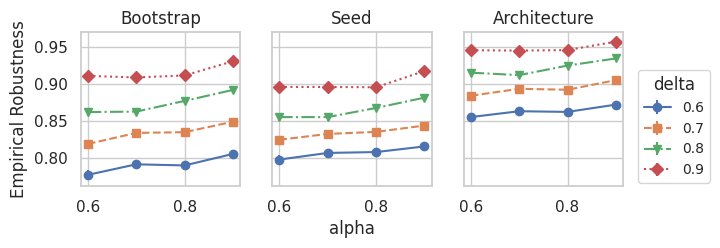

In [138]:
experiments = conf_sweep_raw_df["experiment_type"].unique()

figwidth = 7
fig, axes = plt.subplots(
    ncols=len(experiments), figsize=(figwidth, 2), sharex=True, sharey=True
)

markers = ["o", "s", "v", "D"]
linestyles = ["-", "--", "-.", ":"]

for i, experiment in enumerate(experiments):
    ax = axes[i] if len(experiments) > 1 else axes

    tmp_conf_df = conf_sweep_raw_df.copy()
    tmp_conf_df = tmp_conf_df[tmp_conf_df["experiment_type"] == experiment]

    for j, delta in enumerate(sorted(tmp_conf_df["delta_robustness"].unique())):
        tmp_delta_df = tmp_conf_df[tmp_conf_df["delta_robustness"] == delta]
        # sns.lineplot(data=tmp_delta_df, x='beta_confidence', y='robust_counterfactual_validity_model2', ax=ax, label=f'delta={delta}')

        data = tmp_delta_df.groupby("beta_confidence")[
            "robust_counterfactual_validity_model2"
        ].mean()
        std = tmp_delta_df.groupby("beta_confidence")[
            "robust_counterfactual_validity_model2"
        ].std()
        cnt = tmp_delta_df.groupby("beta_confidence")[
            "robust_counterfactual_validity_model2"
        ].count()

        ax.errorbar(
            data.index,
            data,
            yerr=1.96 * std / np.sqrt(cnt),
            label=f"{delta}",
            marker=markers[j],
            linestyle=linestyles[j],
        )

    ax.set_title(experiment)
    if i == 1:
        ax.set_xlabel("alpha")
    if i == 0:
        ax.set_ylabel("Empirical Robustness")

plt.legend(
    title="delta", bbox_to_anchor=(1.05, 0.8), loc="upper left", ncol=1, fontsize=10
)

plt.savefig(
    f"{images_dir}/4_1_empirical_robustness_vs_beta_confidence_and_delta.png",
    dpi=300,
    bbox_inches="tight",
)

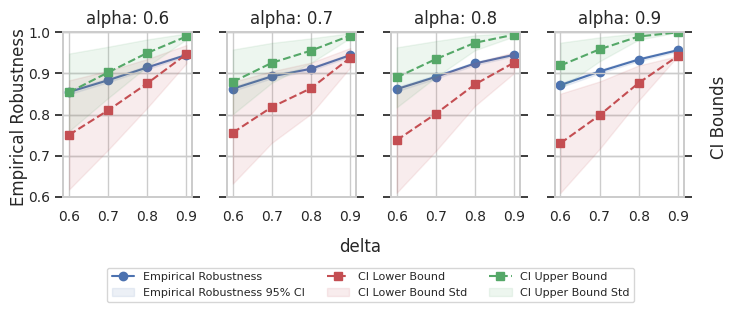

In [ ]:
# Use only matplotlib
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = conf_sweep_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df["experiment_type"] == "Architecture"]
method = "GrowingSpheres"

conf = sorted(_tmp_df["beta_confidence"].unique().tolist())
delta_robustness = _tmp_df["delta_robustness"].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
plt.close()
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(7, 2.5), sharex=True, sharey=True)
axes = axes.flatten()


for i, c in enumerate(conf):
    _df = _tmp_df[(_tmp_df["beta_confidence"] == c)]

    data = _df.groupby("delta_robustness")[
        "robust_counterfactual_validity_model2"
    ].mean()
    ax = axes[i]
    ax.plot(
        delta_robustness,
        data,
        marker="o",
        linestyle="-",
        color="b",
        label="Empirical Robustness",
    )
    emprob_ci = (
        1.96
        * _df.groupby("delta_robustness")["robust_counterfactual_validity_model2"].std()
        / np.sqrt(
            _df.groupby("delta_robustness")[
                "robust_counterfactual_validity_model2"
            ].count()
        )
    )
    ax.fill_between(
        delta_robustness,
        data - emprob_ci,
        data + emprob_ci,
        color="b",
        alpha=0.1,
        label="Empirical Robustness 95% CI",
    )

    ax.set_title(f"alpha: {c}")

    data_lower = _df.groupby("delta_robustness")["lower_bound_beta"].mean()
    data_upper = _df.groupby("delta_robustness")["upper_bound_beta"].mean()

    ax2 = ax.twinx()

    ax2.plot(
        delta_robustness,
        data_lower,
        marker="s",
        linestyle="--",
        color="r",
        label="CI Lower Bound",
    )
    # add yerr for lower bound
    lb_std = _df.groupby("delta_robustness")["lower_bound_beta"].std()
    ax2.fill_between(
        delta_robustness,
        data_lower - lb_std,
        data_lower + lb_std,
        color="r",
        alpha=0.1,
        label="CI Lower Bound Std",
    )

    ax2.plot(
        delta_robustness,
        data_upper,
        marker="s",
        linestyle="--",
        color="g",
        label="CI Upper Bound",
    )
    # add yerr
    ub_std = _df.groupby("delta_robustness")["upper_bound_beta"].std()
    ax2.fill_between(
        delta_robustness,
        data_upper - ub_std,
        data_upper + ub_std,
        color="g",
        alpha=0.1,
        label="CI Upper Bound Std",
    )

    l = 0.7
    ax.set_ylim(l, 1)
    ax2.set_ylim(l, 1)
    ax.set_xticks([0.6, 0.7, 0.8, 0.9])
    ax.set_yticks([0.6, 0.7, 0.8, 0.9, 1])
    ax2.set_yticks([0.6, 0.7, 0.8, 0.9, 1])

    # Decrease font size of the labels
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax2.tick_params(axis="both", which="major", labelsize=10)

    # Turn off label ticks for ax2 on the plots that are not on the right
    if j != len(experiment_types) - 1:
        ax2.set_yticklabels([])

    handles, labels = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    handles_combined = handles + handles2
    labels_combined = labels + labels2


# Add one xlabel for all the plots
fig.text(0.5, -0.04, "delta", ha="center")
fig.text(0.00, 0.5, "Empirical Robustness", va="center", rotation="vertical")
fig.text(1.0, 0.5, "CI Bounds", va="center", rotation="vertical")

fig.legend(
    bbox_to_anchor=(0.9, -0.08),
    handles=handles_combined,
    labels=labels_combined,
    ncol=3,
    fontsize=8,
)

plt.tight_layout()
plt.savefig(
    f"{images_dir}/4_1_empirical_robustness_ci_bounds_vs_confidence.png",
    dpi=300,
    bbox_inches="tight",
)

plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_2] Ablation (k)</div>

In [141]:
k_raw_df = ksweep_df.copy()

In [142]:
k_raw_df["delta_robustness"].value_counts()

0.9    238106
Name: delta_robustness, dtype: int64

In [143]:
k_raw_df["k_mlps_in_B"].value_counts()

16    27000
20    27000
8     27000
12    27000
36    27000
28    27000
24    27000
32    27000
40    13504
44     7101
48     1501
Name: k_mlps_in_B, dtype: int64

In [144]:
# Drop where k=56 as this run crashed
k_raw_df = k_raw_df[k_raw_df["k_mlps_in_B"] != 56]

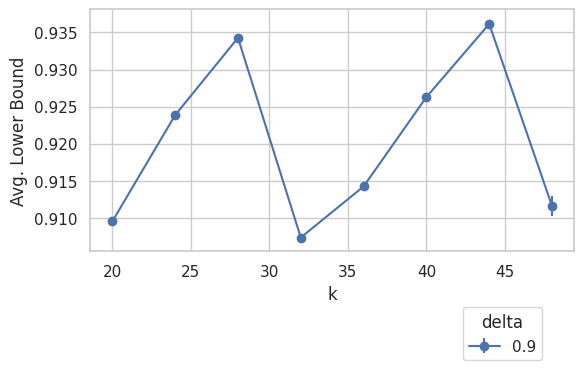

In [145]:
fig, axes = plt.subplots(figsize=(6, 4))

markers = ["o", "s", "v"]
linestyles = ["-", "--", "-."]

for i, delta in enumerate(k_raw_df["delta_robustness"].unique()):
    _df = k_raw_df[k_raw_df["delta_robustness"] == delta]
    data = _df.groupby("k_mlps_in_B")["lower_bound_beta"].mean()
    std = _df.groupby("k_mlps_in_B")["lower_bound_beta"].std()
    cnt = _df.groupby("k_mlps_in_B")["lower_bound_beta"].count()

    axes.errorbar(
        data.index,
        data,
        yerr=1.96 * std / np.sqrt(cnt),
        label=f"{delta}",
        marker=markers[i],
        linestyle=linestyles[i],
    )

plt.legend(title="delta", bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.xlabel("k")
plt.ylabel("Avg. Lower Bound")
plt.tight_layout()

plt.savefig(f"{images_dir}/4_2_lb_beta_vs_k_mlps.png", dpi=300, bbox_inches="tight")

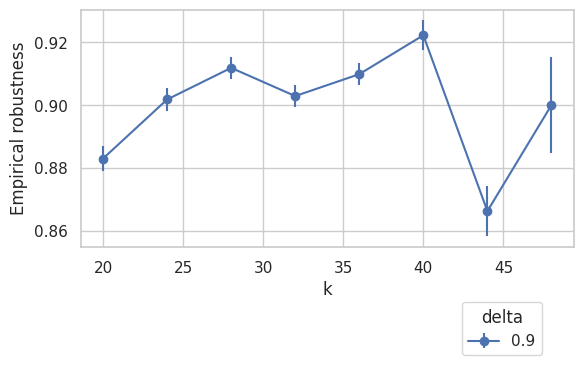

In [146]:
fig, axes = plt.subplots(figsize=(6, 4))

markers = ["o", "s", "v"]
linestyles = ["-", "--", "-."]

for i, delta in enumerate(k_raw_df["delta_robustness"].unique()):
    _df = k_raw_df[k_raw_df["delta_robustness"] == delta]
    data = _df.groupby("k_mlps_in_B")["robust_counterfactual_validity_model2"].mean()
    std = _df.groupby("k_mlps_in_B")["robust_counterfactual_validity_model2"].std()
    cnt = _df.groupby("k_mlps_in_B")["robust_counterfactual_validity_model2"].count()

    axes.errorbar(
        data.index,
        data,
        yerr=1.96 * std / np.sqrt(cnt),
        label=f"{delta}",
        marker=markers[i],
        linestyle=linestyles[i],
    )

plt.legend(title="delta", bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.xlabel("k")
plt.ylabel("Empirical robustness")
plt.tight_layout()

plt.savefig(f"{images_dir}/4_2_ER_vs_k_mlps.png", dpi=300, bbox_inches="tight")

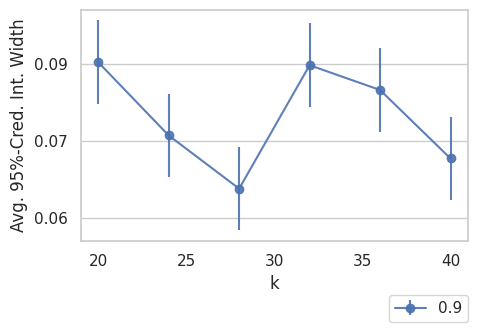

In [147]:
from matplotlib.ticker import FormatStrFormatter

_tmp_df = k_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df["experiment_type"] == "Architecture"]

fig, ax = plt.subplots(figsize=(5, 3))

_tmp_df["lb-ub"] = _tmp_df["upper_bound_beta"] - _tmp_df["lower_bound_beta"]
delts = _tmp_df["delta_robustness"].unique()
ks = sorted(_tmp_df["k_mlps_in_B"].unique())
av_ci_width = (
    _tmp_df.groupby(["k_mlps_in_B", "delta_robustness"])["lb-ub"].mean().reset_index()
)

markers = ["o", "s", "x", "d", "^"]
linestyles = ["-", "--", "-.", ":", "-"]

for i, delta in enumerate(delts):
    data = av_ci_width[av_ci_width["delta_robustness"] == delta]
    plt.errorbar(
        data["k_mlps_in_B"],
        data["lb-ub"],
        marker=markers[i],
        linestyle=linestyles[i],
        label=f"{delta}",
        yerr=1.96 * data["lb-ub"].std() / np.sqrt(data["lb-ub"].count()),
        alpha=0.9,
    )

# format y-axis to round to 2 decimal places
ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))

# leave only 4 ticks on the y-axis
ax.yaxis.set_major_locator(plt.MaxNLocator(4))

# Remove vertical gridlines
ax.grid(axis="x")

plt.legend(bbox_to_anchor=(1.02, -0.2), ncol=5)
plt.xlabel("k")
plt.ylabel("Avg. 95%-Cred. Int. Width")
# plt.tight_layout()

plt.savefig(f"{images_dir}/4_2_ci_width_vs_k_mlps.png", dpi=300, bbox_inches="tight")

IndexError: index 6 is out of bounds for axis 0 with size 6

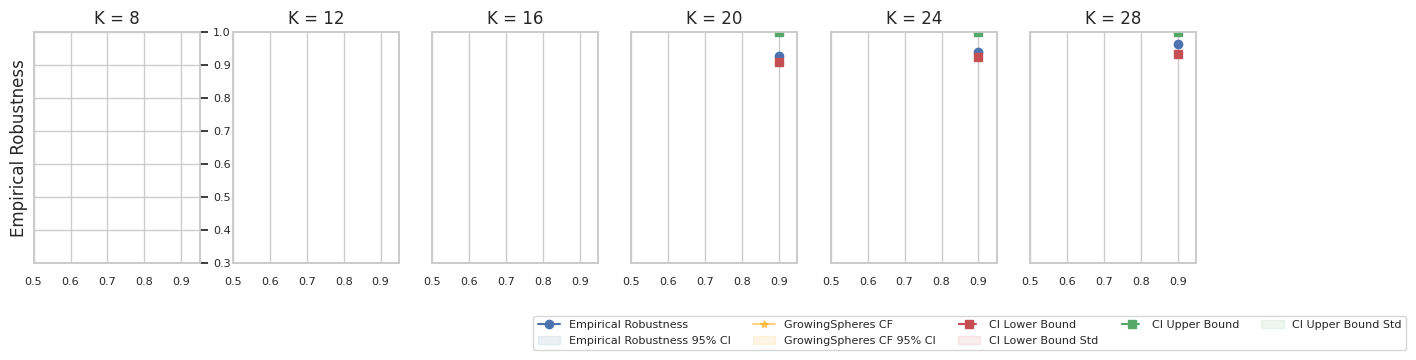

In [148]:
# Use only matplotlib
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = k_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df["experiment_type"] == "Architecture"]
method = "GrowingSpheres"

ks = sorted(_tmp_df["k_mlps_in_B"].unique().tolist())
delta_robustness = _tmp_df["delta_robustness"].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 3), sharex=True, sharey=True)
axes = axes.flatten()


for i, k in enumerate(ks):
    _df = _tmp_df[(_tmp_df["k_mlps_in_B"] == k)]

    data = _df.groupby("delta_robustness")[
        "robust_counterfactual_validity_model2"
    ].mean()
    ax = axes[i]
    ax.plot(
        delta_robustness,
        data,
        marker="o",
        linestyle="-",
        color="b",
        label="Empirical Robustness",
    )
    emprob_ci = (
        1.96
        * _df.groupby("delta_robustness")["robust_counterfactual_validity_model2"].std()
        / np.sqrt(
            _df.groupby("delta_robustness")[
                "robust_counterfactual_validity_model2"
            ].count()
        )
    )
    ax.fill_between(
        delta_robustness,
        data - emprob_ci,
        data + emprob_ci,
        color="b",
        alpha=0.1,
        label="Empirical Robustness 95% CI",
    )

    ax.set_title(f"K = {k}")

    if i == 0:
        ax.set_ylabel("Empirical Robustness")

    data_lower = _df.groupby("delta_robustness")["lower_bound_beta"].mean()
    data_upper = _df.groupby("delta_robustness")["upper_bound_beta"].mean()

    ax2 = ax.twinx()

    ax2.plot(
        delta_robustness,
        data_lower,
        marker="s",
        linestyle="--",
        color="r",
        label="CI Lower Bound",
    )
    # add yerr for lower bound
    lb_std = _df.groupby("delta_robustness")["lower_bound_beta"].std()
    ax2.fill_between(
        delta_robustness,
        data_lower - lb_std,
        data_lower + lb_std,
        color="r",
        alpha=0.1,
        label="CI Lower Bound Std",
    )

    ax2.plot(
        delta_robustness,
        data_upper,
        marker="s",
        linestyle="--",
        color="g",
        label="CI Upper Bound",
    )
    # add yerr
    ub_std = _df.groupby("delta_robustness")["upper_bound_beta"].std()
    ax2.fill_between(
        delta_robustness,
        data_upper - ub_std,
        data_upper + ub_std,
        color="g",
        alpha=0.1,
        label="CI Upper Bound Std",
    )

    if i == len(ks) - 1:
        ax2.set_ylabel("CI Bounds")

    # Plot baseline
    for m, color in zip(["GrowingSpheres"], ["orange"]):
        __df = _df[_df["base_cf_method"] == m]
        base = __df["base_counterfactual_validity_model2"].mean()
        base_std = __df["base_counterfactual_validity_model2"].std()
        base_ci = (
            1.96
            * base_std
            / np.sqrt(__df["base_counterfactual_validity_model2"].count())
        )
        ax.plot(
            delta_robustness,
            [base] * len(delta_robustness),
            color=color,
            linestyle="-",
            label=f"{m} CF",
            marker="*",
            alpha=0.5,
        )
        ax.fill_between(
            delta_robustness,
            base - base_ci,
            base + base_ci,
            color=color,
            alpha=0.1,
            label=f"{m} CF 95% CI",
        )

    l = 0.3
    ax.set_ylim(l, 1)
    ax2.set_ylim(l, 1)
    ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
    # Make x-axis labels more coarse i.e. only show rounded to tenths

    # ax_lim = ax.get_xlim()
    # ax.set_xticks(np.arange(ax_lim[0], ax_lim[1], 0.1).round(1))

    if i == 4:
        ax_legend_handles, ax_legend_labels = ax.get_legend_handles_labels()
        ax2_legend_handles, ax2_legend_labels = ax2.get_legend_handles_labels()

        ax.legend(
            ax_legend_handles + ax2_legend_handles,
            ax_legend_labels + ax2_legend_labels,
            ncol=5,
            loc="lower right",
            bbox_to_anchor=(3.5, -0.4),
            fontsize=8,
        )

    # Decrease font size of the labels
    ax.tick_params(axis="both", which="major", labelsize=8)
    ax2.tick_params(axis="both", which="major", labelsize=8)

    # Turn off label ticks for ax2 on the plots that are not on the right

    if i != 0:
        ax2.set_yticklabels([])
        ax2.set_yticks([])
        ax.set_yticks([])
        ax.set_yticklabels([])


dataset = _tmp_df["dataset_name"].unique()[0]
experiment_type = _tmp_df["experiment_type"].unique()[0]
# plt.suptitle(f'Empirical Robustness vs K MLPs in B (Dataset: {dataset}, Experiment Type: {experiment_type})')
plt.savefig(
    f"{images_dir}/4_2_empirical_robustness_ci_bounds_vs_k.png",
    dpi=300,
    bbox_inches="tight",
)

plt.tight_layout()
plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_3] Ablation (generalizations)</div>

In [ ]:
generalization_results_path = results_path + "/generalization"
gen_raw_df = process_results(generalization_results_path)

Reading results: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


In [ ]:
gen_raw_df["experiment_type"].value_counts()

Architecture    10301
Name: experiment_type, dtype: int64

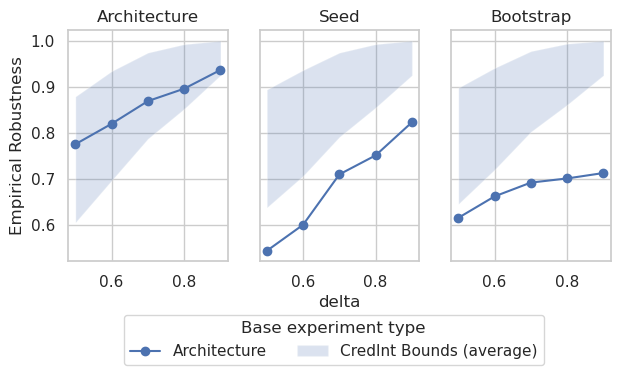

In [ ]:
generalizations = gen_raw_df["experiment_generalization_type"].unique()
experiments = gen_raw_df["experiment_type"].unique()

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(7, 3), sharex=True, sharey=True)
axes = axes.flatten()
for i, gen in enumerate(generalizations):
    for j, experiment in enumerate(experiments):
        tmp_gen_df = gen_raw_df.copy()
        tmp_gen_df = tmp_gen_df[
            (tmp_gen_df["experiment_type"] == experiment)
            & (tmp_gen_df["experiment_generalization_type"] == gen)
        ]

        lbs = tmp_gen_df["lower_bound_beta"]
        ubs = tmp_gen_df["upper_bound_beta"]

        tmp_grp = tmp_gen_df.groupby("delta_robustness")[
            "robust_counterfactual_validity_model2"
        ].mean()

        axes[i].plot(
            tmp_grp.index, tmp_grp, marker="o", linestyle="-", label=experiment
        )

        tmp_grp_lower = tmp_gen_df.groupby("delta_robustness")[
            "lower_bound_beta"
        ].mean()
        tmp_grp_upper = tmp_gen_df.groupby("delta_robustness")[
            "upper_bound_beta"
        ].mean()

        axes[i].fill_between(
            tmp_grp.index,
            tmp_grp_lower,
            tmp_grp_upper,
            alpha=0.2,
            label="CredInt Bounds (average)",
        )

        axes[i].set_title(gen)
        if i == 1:
            axes[i].set_xlabel("delta")

        if i == 0:
            axes[i].set_ylabel("Empirical Robustness")

        if i == 1:
            axes[i].legend(
                title="Base experiment type",
                loc="upper left",
                ncol=2,
                bbox_to_anchor=(-0.9, -0.2),
            )


# plt.tight_layout()

plt.savefig(
    f"{images_dir}/4_3_empirical_robustness_vs_delta_generalization.png",
    dpi=300,
    bbox_inches="tight",
)

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[5] Time</div>

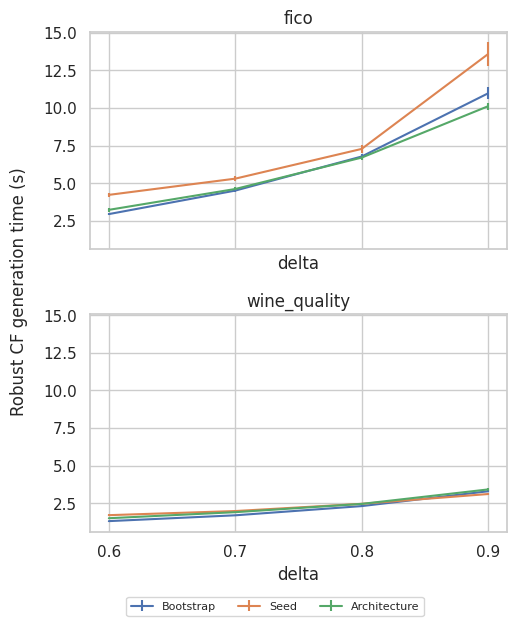

In [ ]:
_d = brce_params_df[brce_params_df["beta_confidence"] == 0.9]

# g = sns.relplot(
#     data=_d[_d['dataset_name'].isin(['fico', 'wine_quality'])],
#     x="delta_robustness",
#     y="robust_counterfactual_time",
#     hue="experiment_type",
#     col="dataset_name",
#     kind="line",
#     height=5,
#     aspect=1.5,
#     col_wrap=2,
# )

# Do this with matplotlib
datasets = ["fico", "wine_quality"]
experiments = _d["experiment_type"].unique()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 6), sharex=True, sharey=True)

for i, dataset in enumerate(datasets):
    for j, experiment in enumerate(experiments):
        _df = _d[
            (_d["dataset_name"] == dataset) & (_d["experiment_type"] == experiment)
        ]
        data = _df.groupby("delta_robustness")["robust_counterfactual_time"].mean()
        std = _df.groupby("delta_robustness")["robust_counterfactual_time"].std()

        axes[i].errorbar(
            data.index,
            data,
            yerr=1.96
            * std
            / np.sqrt(
                _df.groupby("delta_robustness")["robust_counterfactual_time"].count()
            ),
            label=experiment if i == 0 else "",
        )

    axes[i].set_title(dataset)
    axes[i].set_xlabel("delta")
    # axes[i].set_ylabel('Robust CF generation time (s)')

# Do a single y-label for the entire figure
fig.text(-0.03, 0.5, "Robust CF generation time (s)", va="center", rotation="vertical")

# Do a tick every 0.1
plt.xticks(np.arange(0.6, 1, 0.1))
plt.tight_layout()

# Add a legend on the bottom
plt.subplots_adjust(bottom=0.1)
fig.legend(
    bbox_to_anchor=(0.5, 0.0),
    loc="upper center",
    ncol=3,
    fontsize=8,
)

plt.savefig(
    f"{images_dir}/5_1_robust_cf_generation_time_delta.png",
    dpi=300,
    bbox_inches="tight",
)

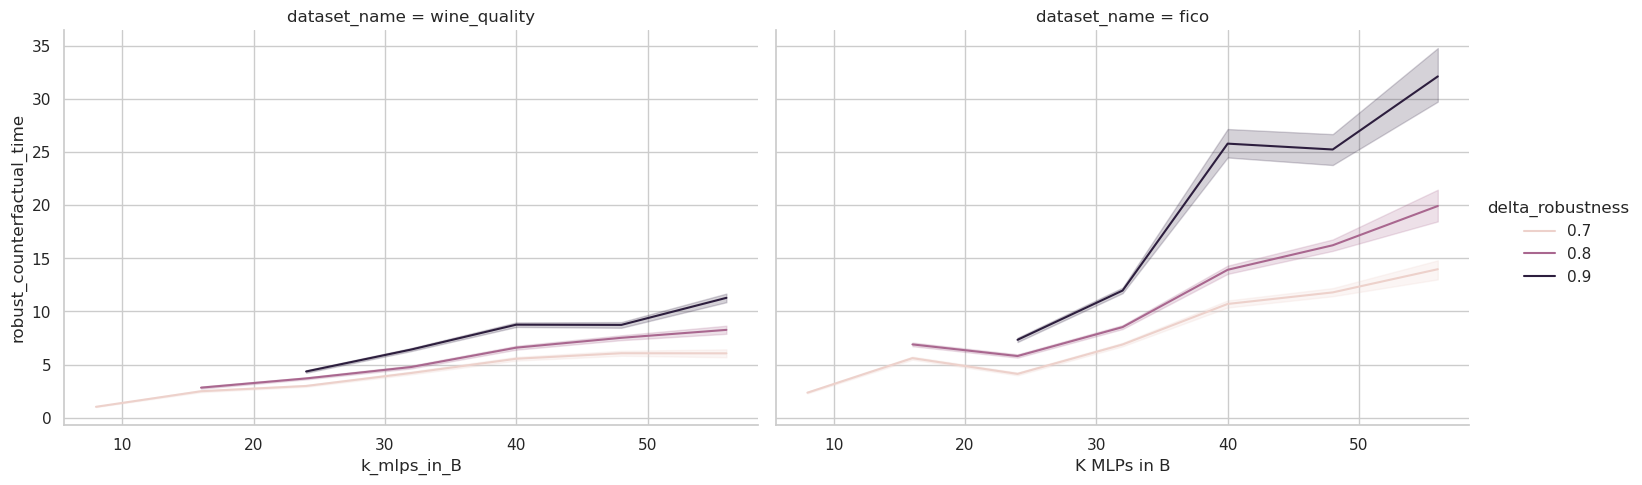

In [ ]:
sns.relplot(
    data=k_raw_df,
    x="k_mlps_in_B",
    y="robust_counterfactual_time",
    hue="delta_robustness",
    col="dataset_name",
    kind="line",
    height=5,
    aspect=1.5,
)
plt.xlabel("K MLPs in B")
plt.ylabel("Robust CF generation time (s)")
plt.savefig(
    f"{images_dir}/5_2_robust_cf_generation_time_k.png", dpi=300, bbox_inches="tight"
)

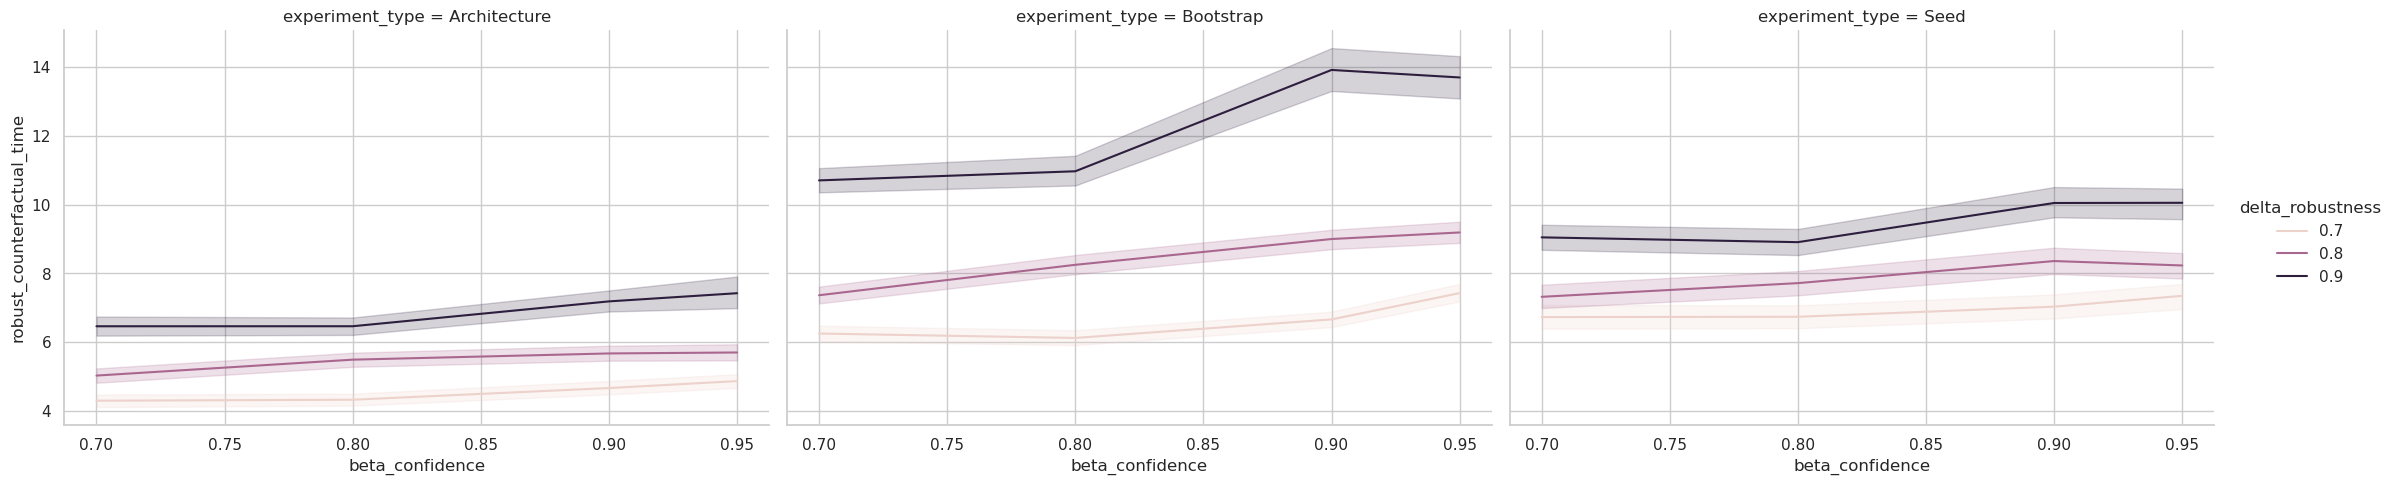

In [ ]:
sns.relplot(
    data=conf_sweep_raw_df,
    x="beta_confidence",
    y="robust_counterfactual_time",
    hue="delta_robustness",
    col="experiment_type",
    kind="line",
    height=5,
    aspect=1.5,
)
plt.savefig(
    f"{images_dir}/5_3_robust_cf_generation_time_beta_confidence.png",
    dpi=300,
    bbox_inches="tight",
)

In [ ]:
# Create a scatterplot time vs empirical robustness
cutoff_up = 0.8
cutoff_low = 0.2
exp = "Seed"

# Print average time for each experiment type
print("BetaROB Time")
tmp_beta = raw_df[raw_df["experiment_type"] == exp]
quantile80 = tmp_beta["robust_counterfactual_time"].quantile(cutoff_up)
quantile20 = tmp_beta["robust_counterfactual_time"].quantile(cutoff_low)
tmp_beta = tmp_beta[tmp_beta["robust_counterfactual_time"] < quantile80]
tmp_beta = tmp_beta[tmp_beta["robust_counterfactual_time"] > quantile20]
print(
    tmp_beta.groupby(["experiment_type", "dataset_name"])["robust_counterfactual_time"]
    .mean()
    .sort_index()
)

print("RobX Time")
tmp_robx = robx_raw_df[robx_raw_df["experiment_type"] == exp]
quantile80 = tmp_robx["robust_counterfactual_time"].quantile(cutoff_up)
quantile20 = tmp_robx["robust_counterfactual_time"].quantile(cutoff_low)
tmp_robx = tmp_robx[tmp_robx["robust_counterfactual_time"] < quantile80]
tmp_robx = tmp_robx[tmp_robx["robust_counterfactual_time"] > quantile20]
print(
    tmp_robx.groupby(["experiment_type", "dataset_name"])["robust_counterfactual_time"]
    .mean()
    .sort_index()
)

print("Base CF Time")
tmp_base = raw_df[raw_df["experiment_type"] == exp]
quntile80 = tmp_base["base_counterfactual_time"].quantile(cutoff_up)
quantile20 = tmp_base["base_counterfactual_time"].quantile(cutoff_low)
tmp_base = tmp_base[tmp_base["base_counterfactual_time"] < quantile80]
tmp_base = tmp_base[tmp_base["base_counterfactual_time"] > quantile20]
print(
    tmp_base.groupby(["experiment_type", "dataset_name"])["base_counterfactual_time"]
    .mean()
    .sort_index()
)

BetaROB Time
experiment_type  dataset_name 
Seed             breast_cancer    2.178209
                 diabetes         1.307726
                 fico             2.222163
                 wine_quality     1.326638
Name: robust_counterfactual_time, dtype: float64
RobX Time
experiment_type  dataset_name 
Seed             breast_cancer    0.572322
                 diabetes         0.278550
                 fico             0.740911
                 wine_quality     0.646489
Name: robust_counterfactual_time, dtype: float64
Base CF Time
experiment_type  dataset_name 
Seed             breast_cancer    0.099611
                 diabetes         0.047365
                 fico             0.077116
                 wine_quality     0.082889
Name: base_counterfactual_time, dtype: float64


In [ ]:
columns_to_keep = [
    # 'dataset_name',
    # 'experiment_type',
    # 'method_name',
    # 'base_counterfactual_validity_model2',
    # 'base_counterfactual_L1_distance_from_base_cf',
    "base_counterfactual_proximityL1",
    "base_counterfactual_proximityL2",
    "base_counterfactual_plausibility",
    "base_counterfactual_discriminative_power",
    "base_counterfactual_time",
]

grpd = supp_df.groupby(["base_cf_method", "dataset_name", "experiment_type"])[
    "base_counterfactual_validity_model2"
].mean()
# grpd.columns = ['Robustness', 'Prox L1', 'Prox L2', 'Plausibility', 'Discriminative Power', 'Time']
grpd.round(3)

base_cf_method  dataset_name  experiment_type
FACE            diabetes      Architecture       0.819
                              Bootstrap          0.744
                              Seed               0.677
                fico          Architecture       0.717
                              Bootstrap          0.681
                              Seed               0.687
RBR             diabetes      Architecture       0.566
                              Bootstrap          0.541
                              Seed               0.558
                fico          Architecture       0.707
                              Bootstrap          0.600
                              Seed               0.580
ROAR            diabetes      Architecture       0.264
                              Bootstrap          0.266
                              Seed               0.243
                fico          Architecture       0.026
                              Bootstrap          0.160
                   

In [ ]:
grpd = supp_df.groupby(["base_cf_method", "dataset_name"])[columns_to_keep].mean()
grpd.columns = ["Prox L1", "Prox L2", "Plausibility", "Discriminative Power", "Time"]
grpd.round(3)

Prox L1  Prox L2  Plausibility  \
base_cf_method dataset_name                                   
FACE           diabetes        0.802    0.371         0.250   
               fico            2.112    0.626         0.446   
RBR            diabetes        0.728    0.341         0.326   
               fico            1.640    0.490         0.469   
ROAR           diabetes        0.852    0.345         0.491   
               fico            0.229    0.049         0.512   

                             Discriminative Power   Time  
base_cf_method dataset_name                               
FACE           diabetes                     0.536  0.050  
               fico                         0.487  0.108  
RBR            diabetes                     0.597  0.275  
               fico                         0.490  0.232  
ROAR           diabetes                     0.785  0.036  
               fico                         0.670  0.025